# Establishing Consensus Host Taxonomy for vOTU Set  

In [1]:
import re,glob,os
import pandas as pd
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Bio import SeqIO, SeqUtils
import seaborn as sns
from functools import reduce
from Bio import Entrez
Entrez.email = 'alexa_nicolas@berkeley.edu'

In [373]:
reads = pd.read_csv('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/4thwedge_sample_reads.csv')
reads['time'] =reads['name*'].str.split("_").str[1].str.replace("h","").astype(int)
reads['mg_type'] = 'virome'

In [212]:
mg_scaffs_df = pd.DataFrame.from_dict(mg_scaffs,orient='index',columns=['length']).reset_index().rename(columns={'index':'scaffold'})

In [214]:
mg_scaffs_df['time'] = mg_scaffs_df['scaffold'].str.split('_').str[1].str.replace("h","").astype(int)

In [227]:
mg_scaffs_df = mg_scaffs_df.groupby(['time'],as_index=False).agg({'length':'sum'})
mg_scaffs_df['mg_type'] = 'metagenome'

In [232]:
scaff_len_df = pd.DataFrame.from_dict(scaff_len,orient='index',columns=['length']).reset_index().rename(columns={'index':'scaffold'})
scaff_len_df['time'] = scaff_len_df['scaffold'].str.split('_').str[1].str.replace("h","").astype(int)
scaff_len_df = scaff_len_df.groupby(['time'],as_index=False).agg({'length':'sum'})
scaff_len_df['mg_type'] = 'virome'

In [272]:
scaff_len_df[['time','length']].set_index('time').to_dict(orient='dict')['length']

{0: 1067288104,
 3: 1073570477,
 24: 732093549,
 48: 554750918,
 72: 357232637,
 168: 311555156}

In [285]:
scaff_len_df_concat = pd.concat([scaff_len_df,mg_scaffs_df])

In [287]:
time_type_count_len = time_type_count.merge(scaff_len_df_concat,on=['time','mg_type'],how='left')
# time_type_count = time_type_count.merge(scaff_len_df,on=['time','mg_type'],how='left')

In [424]:
qlysogenic = qlysogenic.merge(scaff_len_df_concat,on=['time','mg_type'],how='left')
qlysogenic = qlysogenic.merge(reads,on=['time','mg_type'],how='left')
qlysogenic['putative_virus_per_bp_assembled'] = qlysogenic['scaffold']/qlysogenic['length']
qlysogenic['putative_virus_per_bp_reads'] = qlysogenic['scaffold']/qlysogenic['total_read_bp']

In [289]:
time_type_count_len['putative_virus_per_bp'] = time_type_count_len['scaffold']/time_type_count_len['scaffold']

In [374]:
time_type_count_len = time_type_count_len.merge(reads,on=['time','mg_type'],how='left')

In [372]:
# time_type_count_len = time_type_count_len.drop(columns=['total_read_bp','total_assembled_bp'])

/home/alexa/.pyenv/versions/3.8.2/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


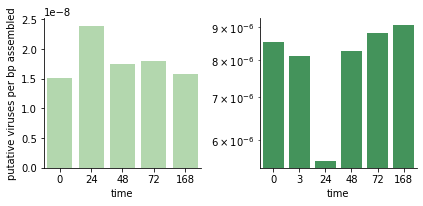

In [399]:
g=sns.FacetGrid(time_type_count_len,col='mg_type',margin_titles=False,sharey=False,sharex=False,hue='mg_type',palette='Greens')
g.map(sns.barplot,'time','putative_virus_per_bp')
# sns.scatterplot(data=time_type_count,x='time',y='scaffold',hue='mg_type')
plt.yscale('log')
plt.tight_layout()
g.set_axis_labels("time", "putative viruses per bp assembled")
g.set_titles("","")
plt.show()

/home/alexa/.pyenv/versions/3.8.2/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


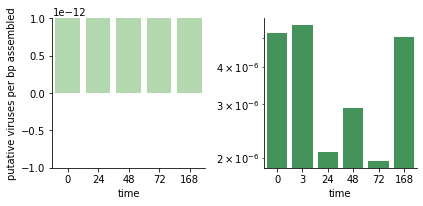

In [431]:
g=sns.FacetGrid(qlysogenic,col='mg_type',margin_titles=False,sharey=False,sharex=False,hue='mg_type',palette='Greens')
g.map(sns.barplot,'time','putative_virus_per_bp_assembled')
plt.yscale('log')
plt.tight_layout()
g.set_axis_labels("time", "putative viruses per bp assembled")
g.set_titles("","")
plt.show()

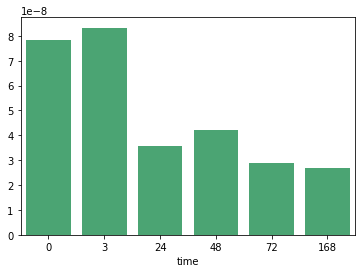

In [443]:
sns.barplot(data=time_type_count_len[time_type_count_len['mg_type']=='virome'],x='time',y=time_type_count_len['scaffold']/time_type_count_len['total_read_bp']
            ,color='mediumseagreen')

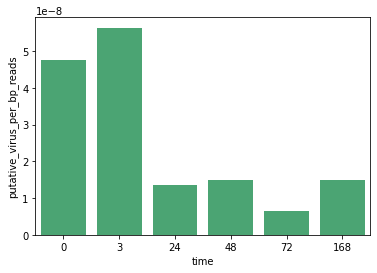

In [440]:
sns.barplot(data=qlysogenic[qlysogenic['mg_type']=='virome'],x='time',y='putative_virus_per_bp_reads',color='mediumseagreen')

/home/alexa/.pyenv/versions/3.8.2/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


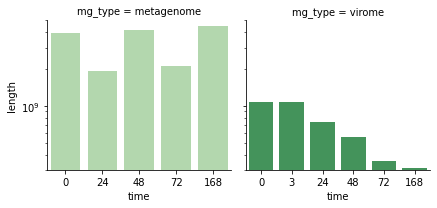

In [393]:
g=sns.FacetGrid(time_type_count_len,col='mg_type',margin_titles=True,sharex=False,hue='mg_type',palette='Greens'#,sharey=False
               )
g.map(sns.barplot,'time','length')
# sns.scatterplot(data=time_type_count,x='time',y='scaffold',hue='mg_type')
plt.yscale('log')
plt.ylim(3*10**8,5*10**9)
plt.show()

In [303]:
time_type_count_len[time_type_count_len['mg_type']=='virome'].to_csv(viral_dir+"pphage_pertime_522021.csv",index=False)

In [645]:
# with open('listfile.txt', 'w') as filehandle:
#     filehandle.writelines("%s\n" % place for place in places_list)
with open(viral_dir+"/list_v_set_4232021.txt",'w') as filehandle:
    filehandle.writelines("%s\n" % scaff for scaff in pphage)

In [ ]:
# extract pphage from virome assemblies 
viral_dir = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/'
assembly_dir = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/'
pphage_fa = viral_dir+"viral_set/4thw_12C16O_putative_virus.fa"
virus_records =[]
metag_assembly_dir = '/groups/banfield/projects/environmental/4thwedge/2020/assembly.d/'

# define empty list
pphage = []
# open file and read the content in a list
with open(viral_dir+"/list_v_set_4232021.txt",'r') as filehandle:
    filecontents = filehandle.readlines()
    for line in filecontents:
        # remove linebreak which is the last character of the string
        # add item to the list
        pphage.append(line.strip())


for assembly in glob.glob(assembly_dir + "*megahit/*ct.fa"):
    print(assembly)
    for record in SeqIO.parse(open(assembly), "fasta"):
        print(record.id)
        if record.id in pphage:
            virus_records.append(record)
            print("Added")
        
for assembly in glob.glob(metag_assembly_dir + "*megahit/12C16O_*h_*_unf_scaffold_min1000.fa"):
    print(assembly)
    for record in SeqIO.parse(open(assembly), "fasta"):
        print(record.id)
        if record.id in pphage:
            virus_records.append(record)
            print("Added")

with open(pphage_fa,'w') as output_handle:       
    SeqIO.write(virus_records, output_handle, "fasta")  
    
# Ran this in terminal

In [664]:
# run cd-hit 
# cd-hit flags to use -d 0 -T 48 -c 0.95 -aS 0.85 (shorter seq needs to be 85% of longer)
cd_hit = "sbatch --wrap '/shared/software/bin/cd-hit -i " + pphage_fa + " -o " + pphage_fa + ".95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0'"
print(cd_hit)

sbatch --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0'


In [327]:
# taking a long time, try running without alignment cutoff 
# how much quicker if just dereplicating sequences of similar length?
cd_hit = "sbatch -J cdhit-0a --wrap '/shared/software/bin/cd-hit -i " + pphage_fa + " -o " + pphage_fa + ".95clustr.fa -c 0.95 -T 48 -s 0.95 -M 0 -d 0'"
print(cd_hit)

sbatch -J cdhit-0a --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa.95clustr.fa -c 0.95 -T 48 -s 0.95 -M 0 -d 0'


In [13]:
# viruses_df.iloc[np.random.choice(len(pphage),10**5,replace=False)]
with open(viral_dir+"viral_set/iter_drep/list_v_randomA_4302021.txt",'w') as filehandle:
    filehandle.writelines("%s\n" % scaff for scaff in set(viruses_df.iloc[np.random.choice(len(pphage),10**5,replace=False)]['scaffold']))
# because some duplicates in spreadsheet, have fewer than 10k scaffs selected 

In [50]:
listA = []
with open(viral_dir+"viral_set/iter_drep/list_v_randomA_4302021.txt",'r') as filehandle:
    contents= filehandle.readlines()
    for line in contents:
        listA.append(line.strip())

In [44]:
# pullseq
A_fa = viral_dir + "viral_set/iter_drep/v_randomA_4302021.fa"
pullseq = "/shared/software/bin/pullseq -i " + pphage_fa + " -n " + viral_dir+"viral_set/iter_drep/list_v_randomA_4302021.txt > " + A_fa
print(pullseq)
cd_hitA = "/shared/software/bin/cd-hit -i " + A_fa + " -o " + A_fa + ".95clustr.fa -c 0.95 -T 8 -aS 0.85 -M 0"
print(cd_hitA)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/list_v_randomA_4302021.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomA_4302021.fa
/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomA_4302021.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomA_4302021.fa.95clustr.fa -c 0.95 -T 8 -aS 0.85 -M 0


In [68]:
# make another list to drep – listB
# how long does 100K sequences take on cluster w 48 threads?
listB = viruses_df[~viruses_df['scaffold'].isin(listA)].iloc[np.random.choice(len(set(pphage)-set(listA)),10**5,replace=False)]['scaffold']
B_fa = viral_dir+"viral_set/iter_drep/list_v_randomB_5012021.txt"
with open(B_fa,'w') as filehandle:
    filehandle.writelines("%s\n" % scaff for scaff in set(listB))
pullseq = "/shared/software/bin/pullseq -i " + pphage_fa + " -n " + B_fa + " > " + viral_dir+"viral_set/iter_drep/v_randomB_5012021.fa" 
print(pullseq)
cd_hitB = "sbatch -J cd-hit.B --wrap '/shared/software/bin/cd-hit -i " + viral_dir+"viral_set/iter_drep/v_randomB_5012021.fa" + " -o " + viral_dir+"viral_set/iter_drep/v_randomB_5012021.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0'"
print(cd_hitB)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/list_v_randomB_5012021.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomB_5012021.fa
sbatch -J cd-hit.B --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomB_5012021.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomB_5012021.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0'


In [ ]:
listC = viruses_df[(~viruses_df['scaffold'].isin(listA)) & (~viruses_df['scaffold'].isin(listB))
                          ].iloc[np.random.choice(len(set(pphage)-set(listA)-set(listB)),25000,replace=False)]['scaffold']

In [115]:
listB = []
with open(viral_dir+"viral_set/iter_drep/list_v_randomB_5012021.txt",'r') as filehandle:
    contents= filehandle.readlines()
    for line in contents:
        listB.append(line.strip())
listC = []
with open(viral_dir+"viral_set/iter_drep/list_v_randomC_5012021.txt",'r') as filehandle:
    contents= filehandle.readlines()
    for line in contents:
        listC.append(line.strip())

In [186]:
C = viral_dir+"viral_set/iter_drep/list_v_randomC_5012021.txt"
C_fa = viral_dir+"viral_set/iter_drep/v_randomC_5012021.fa" 
with open(C,'w') as filehandle:
    filehandle.writelines("%s\n" % scaff for scaff in set(listC))
pullseq = "/shared/software/bin/pullseq -i " + pphage_fa + " -n " + C + " > " + C_fa
print(pullseq)
cd_hitC = "sbatch -J cd-hit.C --wrap '/shared/software/bin/cd-hit -i " + C_fa + \
            " -o " + C_fa.replace(".fa",".95clustr.fa") + " -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'"
print(cd_hitC)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/list_v_randomC_5012021.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomC_5012021.fa
sbatch -J cd-hit.C --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomC_5012021.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomC_5012021.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'


In [309]:
listD = viruses_df[(~viruses_df['scaffold'].isin(listA)) & 
                   (~viruses_df['scaffold'].isin(listB)) &
                   (~viruses_df['scaffold'].isin(listC))
                          ].iloc[np.random.choice(len(set(pphage)-set(listA)-set(listB)-set(listC)),30000,replace=False)]['scaffold']

In [311]:
D = viral_dir+"viral_set/iter_drep/list_v_randomD_5012021.txt"
D_fa = viral_dir+"viral_set/iter_drep/v_randomD_5012021.fa" 
with open(D,'w') as filehandle:
    filehandle.writelines("%s\n" % scaff for scaff in set(listD))
pullseq = "/shared/software/bin/pullseq -i " + pphage_fa + " -n " + D + " > " + D_fa
print(pullseq)
cd_hitD = "sbatch -J cd-hit.D --wrap '/shared/software/bin/cd-hit -i " + D_fa + \
            " -o " + D_fa.replace(".fa",".95clustr.fa") + " -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'"
print(cd_hitD)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/list_v_randomD_5012021.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomD_5012021.fa
sbatch -J cd-hit.D --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomD_5012021.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomD_5012021.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'


In [325]:
listE = viruses_df[(~viruses_df['scaffold'].isin(listA)) & 
                   (~viruses_df['scaffold'].isin(listB)) &
                   (~viruses_df['scaffold'].isin(listC)) &
                   (~viruses_df['scaffold'].isin(listD))
                          ].iloc[np.random.choice(len(set(pphage)-set(listA + listB + listC + listD.tolist())),30000,replace=False)]['scaffold']

In [326]:
E = viral_dir+"viral_set/iter_drep/list_v_randomE_5032021.txt"
E_fa = viral_dir+"viral_set/iter_drep/v_randomE_5032021.fa" 
with open(E,'w') as filehandle:
    filehandle.writelines("%s\n" % scaff for scaff in set(listE))
pullseq = "/shared/software/bin/pullseq -i " + pphage_fa + " -n " + E + " > " + E_fa
print(pullseq)
cd_hit = "sbatch -J cd-hit.E --wrap '/shared/software/bin/cd-hit -i " + E_fa + \
            " -o " + E_fa.replace(".fa",".95clustr.fa") + " -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'"
print(cd_hit)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/list_v_randomE_5032021.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomE_5032021.fa
sbatch -J cd-hit.E --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomE_5032021.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/iter_drep/v_randomE_5032021.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'


* cd-hit.B running start 2:46 PM 5/1/2021 
* cd-hit.C running start 4:19 PM

In [481]:
# pphage_fa, need to pullseq for only scaffolds that meet length thresholds 

phage_set_list_file = viral_dir + 'viral_set/drep_len_filter/putative_phage_filtered_len.txt'
with open(phage_set_list_file,'w') as filehandle:
    filehandle.writelines("%s\n" % scaff for scaff in set_scaffs_pphage)


In [521]:
phage_set_list_file.replace('txt','fa')

'/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/putative_phage_filtered_len.fa'

In [485]:
pullseq = "/shared/software/bin/pullseq -i " + pphage_fa + " -n " + phage_set_list_file + " > " + phage_set_list_file.replace('txt','fa')
print(pullseq)
cd_hit = "sbatch -J cd-hit.sh --wrap '/shared/software/bin/cd-hit -i " + phage_set_list_file.replace('txt','fa') + \
            " -o " + phage_set_list_file.replace('txt',"95clustr.fa") + " -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'"
print(cd_hit)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/putative_phage_filtered_len.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/putative_phage_filtered_len.fa
sbatch -J cd-hit.sh --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/putative_phage_filtered_len.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/putative_phage_filtered_len.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'


dereplication still taking a very very long time (> 6 days) 
strategy:
1. separate all sequences greater than 20,000 bp and dereplicate 
2. dereplicate sequences shorter than 20kbp

In [511]:
phage_set_length_fa = phage_set_list_file.replace('txt','fa')
drep_size_out = os.path.dirname(phage_set_length_fa)
pullseq1 = "/shared/software/bin/pullseq -i " + phage_set_length_fa + " -m 20000 > " + drep_size_out + "/putative_phage_filtered_20Kmin_len.fa"
pullseq2 = "/shared/software/bin/pullseq -i " + phage_set_length_fa + " -a 20000 > " + drep_size_out + "/putative_phage_filtered_20Kmax_len.fa"

# print(pullseq1 +"\n" + pullseq2)

maxset = drep_size_out + "/drep_size/putative_phage_filtered_20Kmax_len.fa"
minset = drep_size_out + "/drep_size/putative_phage_filtered_20Kmin_len.fa"
cd_hit1 = "sbatch -J cdh-20kmax --wrap '/shared/software/bin/cd-hit -i " + maxset + \
            " -o " + maxset.replace('fa',"95clustr.fa") + " -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'"
cd_hit2 = "sbatch -J ch20kmin --wrap '/shared/software/bin/cd-hit -i " + minset + \
            " -o " + minset.replace('fa',"95clustr.fa") + " -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'"
print(cd_hit1 + "\n" + cd_hit2)

sbatch -J cdh-20kmax --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/drep_size/putative_phage_filtered_20Kmax_len.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/drep_size/putative_phage_filtered_20Kmax_len.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'
sbatch -J ch20kmin --wrap '/shared/software/bin/cd-hit -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/drep_size/putative_phage_filtered_20Kmin_len.fa -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/drep_size/putative_phage_filtered_20Kmin_len.95clustr.fa -c 0.95 -T 48 -aS 0.85 -M 0 -d 0'


1. take nodes from cd-hit and pullseq, 
2. concatenate node fasta with new random set of sequences  
3. run cd-hit

In [515]:
mmseq_out = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/'
pullseq = "/shared/software/bin/pullseq -i " + minset + " -m 100000 > " + mmseq_out + "putative_phage_filtered_100Kmin_len.fa"
mmseq = "/shared/software/bin/mmseqs easy-cluster --cov-mode 5 -c 0.85 --min-seq-id 0.95 --cluster-mode 2,3 --threads 16 " + \
        mmseq_out + "putative_phage_filtered_100Kmin_len.fa " + mmseq_out + "putative_phage_filtered_100Kmin_len.easy-cluster-mmseqs.fa tmp"
print(mmseq)

/shared/software/bin/mmseqs easy-cluster --cov-mode 5 -c 0.85 --min-seq-id 0.95 --cluster-mode 2,3 --threads 16 /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_filtered_100Kmin_len.fa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_filtered_100Kmin_len.easy-cluster-mmseqs.fa tmp


In [522]:
pullseq = "/shared/software/bin/pullseq -i " + pphage_fa + " -n " + phage_set_list_file + " > " + mmseq_out + "putative_phage_filtered_len.fa"
print(pullseq)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/putative_phage_filtered_len.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_filtered_len.fa


In [529]:
# run mmseqs on cluster with the size filtered set of contigs 
mmseq = "sbatch -J mmseq.sf --wrap '/shared/software/bin/mmseqs easy-cluster --cov-mode 5 -c 0.85 --min-seq-id 0.95 --cluster-mode 2,3 --threads 48 " + \
        mmseq_out + "putative_phage_filtered_len.fa " + mmseq_out + "putative_phage_filtered_len.easy-cluster-mmseqs.fa tmp'"
print(mmseq)

sbatch -J mmseq.sf --wrap '/shared/software/bin/mmseqs easy-cluster --cov-mode 5 -c 0.85 --min-seq-id 0.95 --cluster-mode 2,3 --threads 48 /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_filtered_len.fa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_filtered_len.easy-cluster-mmseqs.fa tmp'


Now use clustered representatives to cluster non length cutoff sequences 

In [530]:
pullseq = "/shared/software/bin/pullseq -e -i " + pphage_fa + " -n " + phage_set_list_file + " > " + mmseq_out + "putative_phage_unfiltered.fa"
print(pullseq)

/shared/software/bin/pullseq -e -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/drep_len_filter/putative_phage_filtered_len.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_unfiltered.fa


In [533]:
# concatenate unfiltered phage with the representative nodes and run mmseqs
cat = "cat " + mmseq_out + "putative_phage_unfiltered.fa " + mmseq_out + "putative_phage_filtered_len.easy-cluster-mmseqs.fa_rep_seq.fasta > " \
        + mmseq_out + "putative_phage_unfiltered_cat_easy-cluster-mmseqs.fa"
print(cat)

mmseq = "sbatch -J mmseq_set --wrap '/shared/software/bin/mmseqs easy-cluster --cov-mode 5 -c 0.85 --min-seq-id 0.95 --cluster-mode 2,3 --threads 48 " + \
        mmseq_out + "putative_phage_unfiltered_cat_easy-cluster-mmseqs.fa " + mmseq_out + "putative_phage_set.easy-cluster-mmseqs.fa tmp5192021'"

print(mmseq)


cat /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_unfiltered.fa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_filtered_len.easy-cluster-mmseqs.fa_rep_seq.fasta > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_unfiltered_cat_easy-cluster-mmseqs.fa
sbatch -J mmseq_set --wrap '/shared/software/bin/mmseqs easy-cluster --cov-mode 5 -c 0.85 --min-seq-id 0.95 --cluster-mode 2,3 --threads 48 /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_unfiltered_cat_easy-cluster-mmseqs.fa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_set.easy-cluster-mmseqs.fa tmp5192021'


* Make blastdb out of all virome scaffolds?
* blast all dereplicated contigs against 

In [575]:
cat = 'cat /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/4Wh2oV_*h_megahit/4Wh2oV_*h_scaffold_ct.fa > ' + \
        '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/assembly_cat/4Wh2oV_scaffolds_ct.fa' 
print(cat)

cat /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/4Wh2oV_*h_megahit/4Wh2oV_*h_scaffold_ct.fa > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/assembly_cat/4Wh2oV_scaffolds_ct.fa


In [576]:
blast_out = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/blast'
cat_scaffs = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/assembly_cat/4Wh2oV_scaffolds_ct.fa'
# makeblastdb -in test.fsa -parse_seqids -blastdb_version 5 -title "Cookbook demo" -dbtype prot
mkdb = 'makeblastdb -in ' + cat_scaffs + ' -parse_seqids -blastdb_version 5 -title '+ '"4Wh2oV – wet-up scaffolds" -dbtype nucl'
print(mkdb)

makeblastdb -in /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/assembly_cat/4Wh2oV_scaffolds_ct.fa -parse_seqids -blastdb_version 5 -title "4Wh2oV – wet-up scaffolds" -dbtype nucl


In [365]:
virset = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set_12C16O_4Wh2oV.fa'
outfile = "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/4W_vOTU_db/viral_scaffold_set_12C16O_4Wh2oV.fa"
mkdb = 'makeblastdb -in ' + virset + ' -parse_seqids -blastdb_version 5 -title '+ '"4th wedge wet-up vOTUs" -dbtype nucl -out ' + outfile
print(mkdb)

makeblastdb -in /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set_12C16O_4Wh2oV.fa -parse_seqids -blastdb_version 5 -title "4th wedge wet-up vOTUs" -dbtype nucl -out /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/4W_vOTU_db/viral_scaffold_set_12C16O_4Wh2oV.fa


Have 2 mmseq dereplication files:

(1) Length filtered dereplicated set of v_sum ≥ 2 putative viral sequences 
> /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_filtered_len.easy-cluster-mmseqs.fa_cluster.tsv

(2) not length filtered dereplicated set 
> /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_set.easy-cluster-mmseqs.fa_cluster.tsv

How to use?

In [656]:
# col 1 = representative sequence / col 2 = scaffold name
# length filtered drep
lf_drep = pd.read_csv(
    "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_filtered_len.easy-cluster-mmseqs.fa_cluster.tsv",
sep='\t',
header=None, names=['rep_seq','scaffold'])
#no filter drep
nf_drep = pd.read_csv(
"/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set/mmseq_drep/putative_phage_set.easy-cluster-mmseqs.fa_cluster.tsv",
sep='\t',
header=None, names=['rep_seq','scaffold'])

In [682]:
drep_set = pd.concat([lf_drep,nf_drep]).drop_duplicates()

In [686]:
scaff_set_drep = scaff_set.merge(drep_set,on='scaffold',how='left')

In [691]:
# read in taxonomy tables per contig / scaffold to bin to support final curation 
s2bs = []
for s2b in glob.glob("/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/binning.d/dastool/post_ggkbase_curate/*to_bin.tsv"):
    s2bs.append(pd.read_csv(s2b,sep='\t'))
scaff2bin = pd.concat(s2bs)

contig_tax = []
for ct in glob.glob("/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/binning.d/contig_taxa/*contig-taxonomy.tsv"):
    contig_tax.append(pd.read_csv(ct,sep='\t'))
contig_tax_df = pd.concat(contig_tax)

In [692]:
scaff2bin.rename(columns={'scaffold_name':'scaffold'},inplace=True)
contig_tax_df.rename(columns={'Contig name':'scaffold'},inplace=True)

In [693]:
contig_tax_df[['scaffold','Coverage','GC %','Taxonomy winner','Winner %','Phylum winner','Phylum winner %','Domain winner','Domain winner %']]

,scaffold,Coverage,GC %,Taxonomy winner,Winner %,Phylum winner,Phylum winner %,Domain winner,Domain winner %
0,4Wh2oV_3h_scaffold_1835221,23.55,66.90,Streptomyces sp. W75,0.5,Actinobacteria,0.50,Bacteria,0.50
1,4Wh2oV_3h_scaffold_1030210,22.63,68.63,NaN,NaN,unknown,1.00,unknown,1.00
2,4Wh2oV_3h_scaffold_737138,79.40,46.40,Hyalangium minutum,1.0,Proteobacteria,1.00,Bacteria,1.00
3,4Wh2oV_3h_scaffold_1102993,26.76,60.00,Rhizobiales,0.5,Proteobacteria,0.50,Bacteria,0.50
4,4Wh2oV_3h_scaffold_810391,16.96,65.67,NaN,NaN,unknown,1.00,unknown,1.00
...,...,...,...,...,...,...,...,...,...
425913,4Wh2oV_0h_scaffold_209719,31.09,66.57,NaN,NaN,unknown,0.64,unknown,0.64
425914,4Wh2oV_0h_scaffold_69539,53.66,65.76,NaN,NaN,unknown,0.90,unknown,0.90
425915,4Wh2oV_0h_scaffold_210307,24.65,64.92,NaN,NaN,unknown,0.75,unknown,0.75
425916,4Wh2oV_0h_scaffold_210533,54.17,63.83,NaN,NaN,unknown,0.89,unknown,0.89


In [695]:
scaff_set_drep = scaff_set_drep.merge(scaff2bin,on='scaffold',how='left')
scaff_set_drep = scaff_set_drep.merge(contig_tax_df[[
    'scaffold','Coverage','GC %','Taxonomy winner','Winner %','Phylum winner','Phylum winner %','Domain winner','Domain winner %']],
                                      on='scaffold',how='left')

In [698]:
scaff_set_drep.to_csv(viral_dir+'4Wh20v_12C16O_scaff_set_viral_id_drep_5252021.csv',index=False)

In [697]:
scaff_set_drep[(~scaff_set_drep['rep_seq'].isna())
               & (scaff_set_drep['scaffold'].duplicated(keep=False))
               & (scaff_set_drep['scaffold']==scaff_set_drep['rep_seq'])
              & ((scaff_set_drep['circular_VRCA']==True)| (scaff_set_drep['length']>9999))
              ].to_csv(viral_dir+"multiple_viral_id_scaffolds_5262021.csv")

In [760]:
virus_scaff_set_drep = scaff_set_drep[(scaff_set_drep['v_sum']>1)
                & (~scaff_set_drep['scaffold'].duplicated(keep=False))
              & ((scaff_set_drep['length']>9999) | (scaff_set_drep['circular_VRCA']==True))
               & (scaff_set_drep['scaffold']==scaff_set_drep['rep_seq'])
               & (~scaff_set_drep['Phylum winner'].str.contains('Ascomycota',na=False)) 
               & (~scaff_set_drep['Phylum winner'].str.contains('Microgenomates',na=False))
                & (~scaff_set_drep['Phylum winner'].str.contains('Parcubacteria',na=False)) 
               & (~scaff_set_drep['Phylum winner'].str.contains('Saccharibacteria',na=False))
              ].sort_values('scaffold')#.drop_duplicates(subset=['scaffold'],keep=False)

In [761]:
duplicated_set = scaff_set_drep[(scaff_set_drep['v_sum']>1)
              & (((scaff_set_drep['length']>9999) & (scaff_set_drep['miuvig_quality']=='High-quality')) | (scaff_set_drep['circular_VRCA']==True))
               & (scaff_set_drep['scaffold']==scaff_set_drep['rep_seq'])
               & (~scaff_set_drep['Phylum winner'].str.contains('Ascomycota',na=False)) 
               & (~scaff_set_drep['Phylum winner'].str.contains('Microgenomates',na=False))
                & (~scaff_set_drep['Phylum winner'].str.contains('Parcubacteria',na=False)) 
               & (~scaff_set_drep['Phylum winner'].str.contains('Saccharibacteria',na=False))
               & (scaff_set_drep['scaffold'].duplicated(keep=False))
              ].sort_values('scaffold').drop_duplicates(subset=['scaffold'])

In [762]:
virus_scaff_set_drep = pd.concat([virus_scaff_set_drep,duplicated_set])

In [764]:
virus_scaff_set_drep.to_csv(viral_dir+"dereplicated_virus_set_idstats_5262021.csv",index=False)

In [269]:
virus_scaff_set_drep = pd.read_csv(viral_dir+"dereplicated_virus_set_idstats_5262021.csv")

/home/alexa/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [769]:
# need to pullseq for dereplicated phage 
phage_set_file = viral_dir + 'drep_viral_set/viral_scaffold_set.txt'
with open(phage_set_file,'w') as filehandle:
    filehandle.writelines("%s\n" % scaff for scaff in set(virus_scaff_set_drep['scaffold']))

In [772]:
pphage_fa = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set_out/4thw_12C16O_putative_virus.fa'

In [773]:
pullseq = "/shared/software/bin/pullseq -i " + pphage_fa + " -n " + phage_set_file + " > " + viral_dir + "drep_viral_set/viral_scaffold_set_12C16O_4Wh2oV.fa"
print(pullseq)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/viral_set_out/4thw_12C16O_putative_virus.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set.txt > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set_12C16O_4Wh2oV.fa


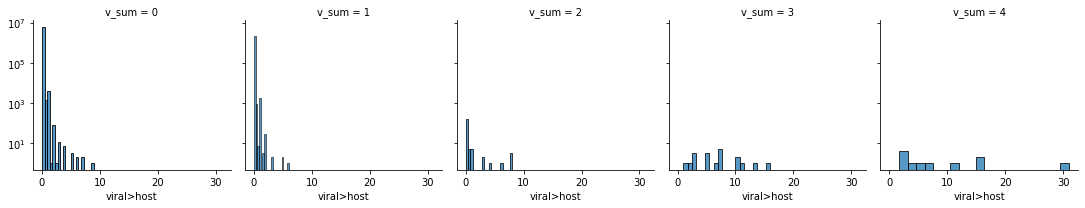

In [608]:
# sns.histplot(df_merged[(~df_merged['viral>host'].isin([np.nan, np.inf]))& (df_merged['v_sum']>=2)] , x='viral>host',bins=20)
g = sns.FacetGrid(mg_merged[~mg_merged['viral>host'].isin([np.nan, np.inf])], col="v_sum", margin_titles=True)
g.map(sns.histplot, 'viral>host',bins=20)

# sns.histplot(df_merged[~df_merged['viral>host'].isin([np.nan, np.inf])] , x='viral>host',
#              hue='v_sum',element='step',palette='Set2')
plt.yscale('log')
# plt.xscale('log')
plt.show()

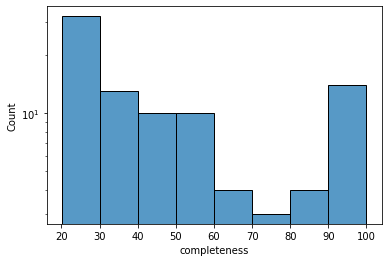

In [609]:
sns.histplot(mg_merged[(mg_merged['completeness']>20) & (mg_merged['v_sum']>=2) ], x='completeness')
plt.yscale('log')
plt.show()

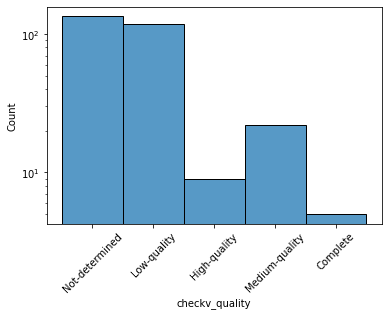

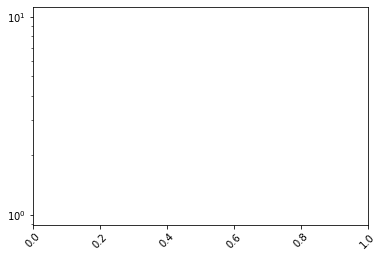

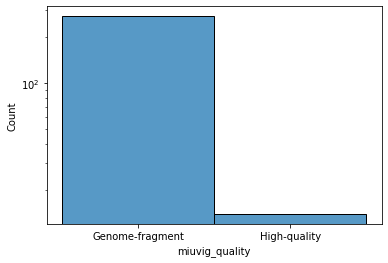

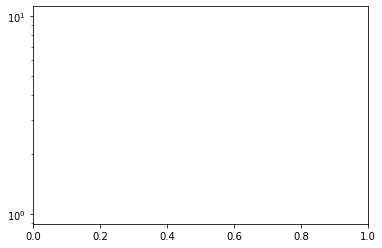

In [610]:
sns.histplot(mg_merged_filtered[mg_merged_filtered['length']>9999][['checkv_quality']].astype(str), x='checkv_quality')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()
sns.histplot(mg_merged_filtered[mg_merged_filtered['length']<10000][['checkv_quality']].astype(str), x='checkv_quality')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

sns.histplot(mg_merged_filtered[mg_merged_filtered['length']>9999][['miuvig_quality']].astype(str), x='miuvig_quality')
plt.yscale('log')
plt.show()
sns.histplot(mg_merged_filtered[mg_merged_filtered['length']<10000][['miuvig_quality']].astype(str), x='miuvig_quality')
plt.yscale('log')
plt.show()

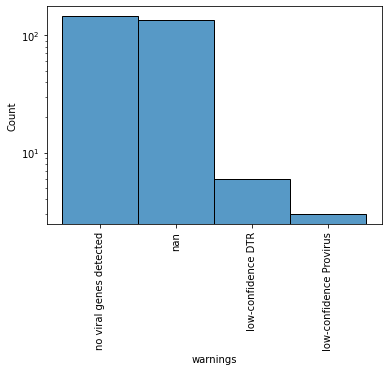

In [613]:
sns.histplot(mg_merged_filtered[mg_merged_filtered['length']>=10000][['warnings']].astype(str), x='warnings')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

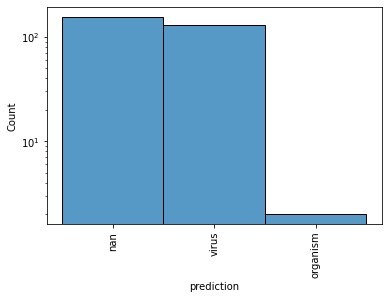

In [614]:
sns.histplot(mg_merged_filtered[mg_merged_filtered['length']>=10000][['prediction']].astype(str), x='prediction')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [270]:
virus_scaff_set_drep.head()

,scaffold,seeker_prediction,seeker_score,pPhage,contig_length,provirus,proviral_length,gene_count,viral_genes,host_genes,...,bin,organism taxonomy,Coverage,GC %,Taxonomy winner,Winner %,Phylum winner,Phylum winner %,Domain winner,Domain winner %
0,12C16O_0h_100_unf_scaffold_170990,Bacteria,0.29,NaN,11612.0,No,NaN,14.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12C16O_0h_100_unf_scaffold_381560,Phage,0.76,NaN,23101.0,No,NaN,19.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12C16O_0h_100_unf_scaffold_392955,Bacteria,0.33,NaN,35016.0,No,NaN,45.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12C16O_0h_100_unf_scaffold_416420,Phage,0.55,NaN,20039.0,No,NaN,28.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12C16O_0h_100_unf_scaffold_424934,Phage,0.54,NaN,10571.0,No,NaN,7.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
virus_scaff_set_drep[virus_scaff_set_drep['scaffold']=='']

,scaffold,seeker_prediction,seeker_score,pPhage,contig_length,provirus,proviral_length,gene_count,viral_genes,host_genes,...,bin,organism taxonomy,Coverage,GC %,Taxonomy winner,Winner %,Phylum winner,Phylum winner %,Domain winner,Domain winner %


In [271]:
virus_scaff_set_drep['scaffold'].nunique()

26368

In [272]:
virus_scaff_set_drep[virus_scaff_set_drep['scaffold'].str.contains('12C')].nunique()

scaffold             229
seeker_prediction      2
seeker_score          77
pPhage                 0
contig_length        228
                    ... 
Winner %               0
Phylum winner          0
Phylum winner %        0
Domain winner          0
Domain winner %        0
Length: 89, dtype: int64

In [448]:
circ_drep_set = virus_scaff_set_drep[virus_scaff_set_drep['circular_VRCA']==True]['scaffold'].unique()

In [449]:
%store circ_drep_set

Stored 'circ_drep_set' (ndarray)


split viral fasta file into multiple files

In [777]:
main_fasta = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set_12C16O_4Wh2oV.fa'
finished_files = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/working_dir/finished_vMAgs.txt'

In [785]:
pullseq = "/shared/software/bin/pullseq -i " + main_fasta + " -n " + finished_files + " -e > " + viral_dir + "drep_viral_set/viral_set_subsets/incomplete_viral_scaffold_set_12C16O_4Wh2oV.fa"
print(pullseq)

/shared/software/bin/pullseq -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set_12C16O_4Wh2oV.fa -n /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/working_dir/finished_vMAgs.txt -e > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/incomplete_viral_scaffold_set_12C16O_4Wh2oV.fa


In [792]:
def batch_iterator(iterator, batch_size):
    """Returns lists of length batch_size.

    This can be used on any iterator, for example to batch up
    SeqRecord objects from Bio.SeqIO.parse(...), or to batch
    Alignment objects from Bio.AlignIO.parse(...), or simply
    lines from a file handle.

    This is a generator function, and it returns lists of the
    entries from the supplied iterator.  Each list will have
    batch_size entries, although the final list may be shorter.
    """
    entry = True  # Make sure we loop once
    while entry:
        batch = []
        while len(batch) < batch_size:
            try:
                entry = next(iterator)
            except StopIteration:
                entry = None
            if entry is None:
                # End of file
                break
            batch.append(entry)
        if batch:
            yield batch

In [793]:
record_iter = SeqIO.parse(open(viral_dir + "drep_viral_set/viral_set_subsets/incomplete_viral_scaffold_set_12C16O_4Wh2oV.fa"), "fasta")
for i, batch in enumerate(batch_iterator(record_iter, 1500)):
    filename = viral_dir + "drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_%i.fasta" % (i + 1)
    with open(filename, "w") as handle:
        count = SeqIO.write(batch, handle, "fasta")
    print("Wrote %i records to %s" % (count, filename))


Wrote 1500 records to /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_1.fasta
Wrote 1500 records to /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_2.fasta
Wrote 1500 records to /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_3.fasta
Wrote 1500 records to /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_4.fasta
Wrote 1500 records to /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_5.fasta
Wrote 1500 records to /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_6.fasta
Wrot

Run Dram-V
> /shared/software/dram/latest/bin/DRAM-v.py annotate -h

requires input / output files 

In [4]:
for fasta in glob.glob(viral_dir + "drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV*fasta"):
    J = os.path.basename(fasta).rsplit("_")[-1].split(".")[0]
    dramv = "sbatch -J dramv-" + J + " --wrap '/shared/software/dram/latest/bin/DRAM-v.py annotate -i " + \
            fasta + \
            " -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_" + J \
            + " --threads 48'"
    print(dramv)

sbatch -J dramv-7 --wrap '/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_7.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_7 --threads 48'
sbatch -J dramv-13 --wrap '/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_13.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_13 --threads 48'
sbatch -J dramv-6 --wrap '/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_6.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/d

running on biotite itself 

sbatch -J dramv-1 --wrap '
/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_1.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_1 --threads 10


sbatch -J dramv-2 --wrap '
/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_2.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_2 --threads 10

sbatch -J dramv-3 --wrap '
/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_3.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_3 --threads 10



sbatch -J dramv-10 --wrap '
/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_10.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_10 --threads 10


sbatch -J dramv-4 --wrap '
/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_4.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_4 --threads 10


sbatch -J dramv-14 --wrap '
/shared/software/dram/latest/bin/DRAM-v.py annotate -i /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_set_subsets/viral_scaffold_set_12C16O_4Wh2oV_14.fasta -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/split_14 --threads 10

In [218]:
# move genbank into one directory
genbank_dir = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/DRAMv_out/genbank/'
#sp.call(call,shell=True)
indir = "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/DRAM-v_output/"
outdir = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/DRAMv_out/'

def mv(file,new_location):
    '''move file'''
    move = "mv " + file + " " + new_location
    sp.call(move,shell=True)
    
def cp(file, new_name):
    '''move file'''
    copy = "cp " + file + " " + new_name
    sp.call(copy,shell=True)

In [216]:
for genbank in glob.glob(indir +"working_dir/*/*gbk"):
    base = os.path.basename(genbank)
    cp(genbank, genbank_dir+base)

In [220]:
for genbank in glob.glob(indir+"split*/genbank/*"):
    base = os.path.basename(genbank)
    cp(genbank, genbank_dir+base)

In [219]:
# pd.concat all annotation files
anno_tsvs = []
for annotation_tsv in glob.glob(indir+"split*/annotations.tsv"):
    anno_tsvs.append(pd.read_csv(annotation_tsv,sep='\t'))

for annotation_tsv in glob.glob(indir + "working_dir/*/annotations.tsv"):
    anno_tsvs.append(pd.read_csv(annotation_tsv,sep='\t'))

annotations = pd.concat(anno_tsvs)

,Unnamed: 0,fasta,scaffold,gene_position,start_position,end_position,strandedness,rank,kegg_id,kegg_hit,...,peptidase_id,peptidase_family,peptidase_hit,peptidase_RBH,peptidase_identity,peptidase_bitScore,peptidase_eVal,vogdb_hits,is_transposon,amg_flags
0,4Wh2oV_3h_scaffold_1000051_1,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,1,2,448,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F
1,4Wh2oV_3h_scaffold_1000051_2,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,2,435,932,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F
2,4Wh2oV_3h_scaffold_1000051_3,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,3,936,1883,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F
3,4Wh2oV_3h_scaffold_1000051_4,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,4,1908,2129,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F
4,4Wh2oV_3h_scaffold_1000051_5,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,5,2126,2260,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F


In [230]:
annotations.rename({'Unnamed: 0':'orf'},axis=1,inplace=True)
annotations.to_csv(outdir+"annotations.tsv",index=False)
annotations.head(5)

,orf,fasta,scaffold,gene_position,start_position,end_position,strandedness,rank,kegg_id,kegg_hit,...,peptidase_id,peptidase_family,peptidase_hit,peptidase_RBH,peptidase_identity,peptidase_bitScore,peptidase_eVal,vogdb_hits,is_transposon,amg_flags
0,4Wh2oV_3h_scaffold_1000051_1,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,1,2,448,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F
1,4Wh2oV_3h_scaffold_1000051_2,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,2,435,932,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F
2,4Wh2oV_3h_scaffold_1000051_3,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,3,936,1883,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F
3,4Wh2oV_3h_scaffold_1000051_4,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,4,1908,2129,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F
4,4Wh2oV_3h_scaffold_1000051_5,4Wh2oV_3h_scaffold_1000051,4Wh2oV_3h_scaffold_1000051,5,2126,2260,-1,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,F


Steps to get vCONTACT2 Running:
1. make a concatenated protein file for all viromes and metagenomes (original)
2. run pullseq for selected vOTUs
3. generate gene to genome mapping file 

In [23]:
assembly = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/'
proteins = []
out_dir = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/'
for protein in glob.glob(assembly + "*megahit/*faa"):
    proteins.append(protein)
cat_cmd = 'cat ' + " ".join(proteins) + " > " + out_dir + "4Wh2oV_scaffolds.fa.genes.faa"
print(cat_cmd)

cat /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/4Wh2oV_0h_megahit/4Wh2oV_0h_scaffold_ct.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/4Wh2oV_48h_megahit/4Wh2oV_48h_scaffold_ct.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/4Wh2oV_24h_megahit/4Wh2oV_24h_scaffold_ct.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/4Wh2oV_168h_megahit/4Wh2oV_168h_scaffold_ct.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/4Wh2oV_72h_megahit/4Wh2oV_72h_scaffold_ct.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/assembly.d/4Wh2oV_3h_megahit/4Wh2oV_3h_scaffold_ct.fa.genes.faa > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/4Wh2oV_scaffolds.fa.genes.faa


In [28]:
proteins = []
for protein in glob.glob(metag_assembly_dir + "*megahit/12C16O_*h_*_unf_scaffold_min1000*faa"):
    proteins.append(protein)
cat_cmd = 'cat ' + " ".join(proteins) + " > " + out_dir + "12C16O_unf_megahit_min1000.fa.genes.faa"
print(cat_cmd)

cat /groups/banfield/projects/environmental/4thwedge/2020/assembly.d/12C16O_72h_100_unf_megahit/12C16O_72h_100_unf_scaffold_min1000.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2020/assembly.d/12C16O_168h_50_unf_megahit/12C16O_168h_50_unf_scaffold_min1000.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2020/assembly.d/12C16O_48h_100_unf_megahit/12C16O_48h_100_unf_scaffold_min1000.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2020/assembly.d/12C16O_0h_100_unf_megahit/12C16O_0h_100_unf_scaffold_min1000.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2020/assembly.d/12C16O_24h_100_unf_megahit/12C16O_24h_100_unf_scaffold_min1000.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2020/assembly.d/12C16O_48h_50_unf_megahit/12C16O_48h_50_unf_scaffold_min1000.fa.genes.faa /groups/banfield/projects/environmental/4thwedge/2020/assembly.d/12C16O_0h_50_unf_megahit/12C16O_0h_50_unf_scaffold_min1000.fa.genes.faa /groups/banfield/

In [29]:
# use /groups/banfield/users/alexa/bioscripts/fasta_filter_protein_from_scaffold.py to pullseq proteins for vOTUs and the concatenated
pullseq_call = 'python /groups/banfield/users/alexa/bioscripts/fasta_filter_protein_from_scaffold.py -p ' + \
                "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/4Wh2oV_scaffolds.fa.genes.faa" + \
                " -s /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set.txt" + \
                " -o " + out_dir + "4Wh2oV_vOTUs.fa.genes.faa"
pullseq_call

'python /groups/banfield/users/alexa/bioscripts/fasta_filter_protein_from_scaffold.py -p /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/4Wh2oV_scaffolds.fa.genes.faa -s /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set.txt -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/4Wh2oV_vOTUs.fa.genes.faa'

In [30]:
# use /groups/banfield/users/alexa/bioscripts/fasta_filter_protein_from_scaffold.py to pullseq proteins for vOTUs and the concatenated
pullseq_call = 'python /groups/banfield/users/alexa/bioscripts/fasta_filter_protein_from_scaffold.py -p ' + \
                "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/12C16O_unf_megahit_min1000.fa.genes.faa" + \
                " -s /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set.txt" + \
                " -o " + out_dir + "12C16O_unf_megahit_vOTUs.fa.genes.faa"
pullseq_call

'python /groups/banfield/users/alexa/bioscripts/fasta_filter_protein_from_scaffold.py -p /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/12C16O_unf_megahit_min1000.fa.genes.faa -s /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/viral_scaffold_set.txt -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/12C16O_unf_megahit_vOTUs.fa.genes.faa'

In [31]:
cat_call = "cat *vOTUs.fa.genes.faa > " + out_dir + "4thWedge_vOTU_proteins.fa.genes.faa"
cat_call

'cat *vOTUs.fa.genes.faa > /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/4thWedge_vOTU_proteins.fa.genes.faa'

In [42]:
proteins = "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/4thWedge_vOTU_proteins.fa.genes.faa"
genes_to_scaff = {}
for record in SeqIO.parse(open(proteins), "fasta"):
    scaff = record.id.rsplit("_",1)[0]
    genes_to_scaff[record.id] = scaff
with open(out_dir+"4thWedge_vOTU_gene2genome.csv","w") as outfile:
    outfile.write("protein_id,contig_id\n")
    for key,val in genes_to_scaff.items():
        outfile.write(key +","+ val +"\n")

In [47]:
mapping_file = out_dir+"4thWedge_vOTU_gene2genome.csv"
vc_call = "sbatch --wrap '/shared/software/bin/vcontact2 -r " + proteins + " --proteins-fp " + mapping_file + \
            " --db ProkaryoticViralRefSeq201-Merged --pcs-mode MCL --vcs-mode ClusterONE --c1-bin /container/programs/cluster_one-1.0.jar -o " \
            + "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/vcontact_out/'"
vc_call

"sbatch --wrap '/shared/software/bin/vcontact2 -r /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/4thWedge_vOTU_proteins.fa.genes.faa --proteins-fp /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/proteins_d/4thWedge_vOTU_gene2genome.csv --db ProkaryoticViralRefSeq201-Merged --pcs-mode MCL --vcs-mode ClusterONE --c1-bin /container/programs/cluster_one-1.0.jar -o /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/vcontact_out/'"

In [51]:
vc_out = pd.read_csv('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/vcontact_out/merged_df.csv').drop(columns=['Unnamed: 0'])

Need to rerun vCONTACT with viruses from emerson lab?

Sources of host taxonomy:

1. CRISPR matches
* spacers in MAGs matched to vOTUs
  (MAG taxonomy from GTDB)

* spacers in unbinned metagenome sequences matched to vOTUs
  (taxonomy using Kaiju)
  
* spacers in vOTUs matched to MAGs
  (MAG taxonomy from GTDB)

* spacer database (Shmakov et al., 2017 doi: 10.1128/mBio.01397-17) aligned to vOTUs
  (spacer taxonomy from NCBI)
  
2. vOTU taxonomy predictions (using Kaiju)

### Workflow:

#### Establishing Kaiju-based taxonomy
  1. unbinned mg contigs with spacers
  2. vOTU taxonomy via kaiju
#### MAG-based taxonomy
  vOTU spacers matched to MAGs
#### NCBI-based taxonomy
  1. Previously published Spacer DB
  2. MAG spacers matched to vOTUs
 
#### Host Linkage
- matching unbinned spacers to vOTUs

#### Cleaning up all host matches and merging into single df

#### Establishing host consensus taxonomy

#### Creating working definition of taxonomies to use in analyses

In [2]:
# MAG scaff to bin and taxonomy
s2b = pd.read_csv('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/MAG_spacer_blast_out/4W_scaf_to_bin_nonderep.txt',
                  sep='\t',header=None,names=['scaffold','Bin'])
b2taxa = pd.read_csv('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/MAG_spacer_blast_out/MAG_tax.csv')
s2b = s2b.merge(b2taxa, how='left',on='Bin')
# s2b['scaffold_id'] = s2b['scaffold'].str.split("_").str[0:5].str.join("_")+"_"+ s2b['scaffold'].str.split("_").str[7:].str.join("_")

In [4]:
mag_ncbi = pd.read_csv(
"/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/csvs/MAG_data_ella/ncbi_mag_taxa.txt",
    sep='\t'
)

In [12]:
# need to read in drep and also mark whether a bin is the representative genome chosen  
representatives = []
drep_dir = '/groups/banfield/projects/environmental/4thwedge/2020/assembly.d/all_MAGs_disrat0.33/dRep/'
for rep in glob.glob(drep_dir + "dereplicated_genomes/*fa"):
    representatives.append(os.path.basename(rep))

drep_df = pd.read_csv(drep_dir+'data_tables/Cdb.csv')
drep_df['representative'] =drep_df['genome'].isin(representatives)

In [ ]:
drep_df['Bin'] = drep_df['genome'].str.replace(".fa","")
drep_df['bin'] = drep_df['Bin'].str.replace(".","_")

In [34]:
# make dict keys = clusters so can match later cluster --> representative genome
clusters = drep_df[drep_df['representative']==True
       ][['secondary_cluster','bin']].set_index('secondary_cluster'
                                               ).to_dict(orient='dict')['bin']

In [16]:
s2b = s2b.merge(drep_df[['secondary_cluster','Bin']],on='Bin',how='left')

In [17]:
# mag_ncbi merge 
s2b = s2b.merge(mag_ncbi.rename(columns={"MAG":'bin','GTDB_taxonomy':'classification'}), 
                how='left',
         on=['bin','classification'],validate='m:1')

### Need to assign an NCBI taxonomy to maximum number of MAGs based on drep cluster

In [ ]:
s2b['taxa'] = s2b[['ncbi_drep']].rename(
columns={'ncbi_drep':'taxa'}).combine_first(s2b[['classification']].rename(
columns={'classification':'taxa'}))

## Unbinned metagenome contig taxonomy via Kaiju

for contigs not in MAGs containing CRISPR arrays, establish contig-level taxonomy using Kaiju

In [122]:
# read in and format kaiju output 
kaiju_unbinned_spacers = pd.read_csv(
'/groups/banfield/projects/environmental/4thwedge/2020/assembly.d/minced_disrat0.33/contigs_w_spacers_kaiju_out_names.tsv',
    sep='\t',
    header=None,
    names=['classified','kaiju_scaffold','ncbi_taxid','kaiju_taxonomy'])
kaiju_unbinned_spacers = kaiju_unbinned_spacers[kaiju_unbinned_spacers['classified']=='C']
kaiju_unbinned_spacers['kaiju_scaffold'] = kaiju_unbinned_spacers['kaiju_scaffold'].str.replace('_scaffold_min_2500_wspacers','')

# vOTU taxonomy via Kaiju

In [2]:
kaiju_vOTUs = pd.read_csv(
'/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/drep_viral_set/kaiju_names_out.tsv',
    sep='\t',
    header=None,
    names=['classified','kaiju_scaffold','ncbi_taxid','kaiju_taxonomy'])
kaiju_vOTUs = kaiju_vOTUs[kaiju_vOTUs['classified']=='C']

In [9]:
kaiju_vOTUs[kaiju_vOTUs['kaiju_taxonomy'].str.contains('virus')].head(3)

,classified,kaiju_scaffold,ncbi_taxid,kaiju_taxonomy
984,C,4Wh2oV_72h_scaffold_118478,2560607,Mycobacterium virus TA17a
1088,C,4Wh2oV_3h_scaffold_781618,2852170,unclassified Avanivirus
1163,C,4Wh2oV_0h_scaffold_2031272,2562660,unclassified Cheoctovirus


For vOTUs with viral taxonomies establish host using Virus-Host DB (https://www.genome.jp/ftp/db/virushostdb/)

In [5]:
virushostdb = pd.read_csv('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/kaiju_out/virushostdb.tsv',sep='\t')

In [13]:
virushostdb[virushostdb['virus name']=="Mycobacterium virus TA17a"]

,virus tax id,virus name,virus lineage,refseq id,KEGG GENOME,KEGG DISEASE,DISEASE,host tax id,host name,host lineage,pmid,evidence,sample type,source organism
10723,2560607,Mycobacterium virus TA17a,Viruses; Duplodnaviria; Heunggongvirae; Urovir...,NC_043767,NaN,NaN,NaN,246196.0,Mycolicibacterium smegmatis MC2 155,Bacteria; Terrabacteria group; Actinobacteria;...,NaN,"NCBI Virus, RefSeq",NaN,NaN


### using ncbi_taxid to get full taxonomy for kaiju contigs predicted
kaiju output does not provide full phylogenetic information – just highest resolution level taxonomy. Use Entrez to look up full NCBI taxonomy for kaiju output using provided ncbi taxids

In [139]:
ncbi_taxid = set(kaiju_vOTUs['ncbi_taxid'].unique().tolist() + kaiju_unbinned_spacers['ncbi_taxid'].unique().tolist())

In [181]:
ncbi_taxa_dict = {}
with open("/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/kaiju_out/ncbi_taxid_kaiju_contigs.tsv", "w") as outfile:
    outfile.write("ncbi_taxid\ttaxonomy\n")
    for taxid in ncbi_taxid:
        # print(taxid)
        try:
            handle = Entrez.efetch(db="Taxonomy", id=taxid, retmode="xml")
            records = Entrez.read(handle)
            ncbi_taxa_dict[taxid] = records[0]['Lineage']
            writeout = str(taxid) + "\t" + str(ncbi_taxa_dict[taxid]) +"\n"
            outfile.write(writeout)

        except:
            print(taxid)
            writeout=str(taxid) + "\tNaN\n"
            outfile.write(writeout)

In [14]:
# create ncbi taxid from tsv previously painstakingly generated using entrez
ncbi_taxid_df = pd.read_csv(
    '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/kaiju_out/ncbi_taxid_kaiju_contigs.tsv',
           sep='\t')
# make dictionary to map taxid
ncbi_taxa_dict = ncbi_taxid_df.set_index('ncbi_taxid').to_dict()['taxonomy']

In [390]:
from Bio import Entrez
Entrez.email = 'alexa_nicolas@berkeley.edu'

with open("/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/kaiju_out/ncbi_taxid_kaiju_contigs.tsv", "a") as outfile:
    for taxid in wsip_ncbi_taxid:
        # print(taxid)
        try:
            print(taxid)
            handle = Entrez.efetch(db="Taxonomy", id=taxid, retmode="xml")
            records = Entrez.read(handle)
            ncbi_taxa_dict[taxid] = records[0]['Lineage']
            writeout = str(taxid) + "\t" + str(ncbi_taxa_dict[taxid]) +"\n"
            outfile.write(writeout)

        except:
            print(taxid, np.nan)
            writeout=str(taxid) + "\tNaN\n"
            outfile.write(writeout)

134537
1620392
2108470
2855394
32049
1080068
1116391
232348
321327
1110509
403
1196095
641
2094119
1752063
2033869
926570
103690
483547
1006576
702967
586416
1273155
2814655
1677857
81479
1826872
2605945


In [662]:
kaiju_out = pd.concat([kaiju_unbinned_spacers,kaiju_vOTUs])

In [155]:
kaiju_out.to_csv(
    '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/kaiju_out/kaiju_contig_taxonomy.csv',
                index=False)

In [666]:
# remove duplicates from Kaiju_out
kaiju_out = kaiju_out.drop_duplicates()

# vOTU spacers 

## make blast db & run BLAST to match to sequences from undereplicated MAGs

In [81]:
virome_spacer_db = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/4Wh2oV_minced_out/4Wh2oV_scaffold_spacers.fa'
MAG_db = '/groups/banfield/projects/environmental/4thwedge/2020/assembly.d/all_MAGs_disrat0.33/concatenated_underep_MAGs/underep_MAGs.fa'
blastn_cmd = '/shared/software/bin/blastn -query ' + virome_spacer_db + " -db " + \
                MAG_db + " -num_threads 16 -outfmt ‘6 qseqid sseqid pident qcovs qstart qend sstart send length evalue bitscore mismatch’ -out " + \
                "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/4Wh2oV_minced_out/blast_out_underep_MAGs/underepMAGs_4Wh2Ovspacers.txt"
print(blastn_cmd)

/shared/software/bin/blastn -query /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/4Wh2oV_minced_out/4Wh2oV_scaffold_spacers.fa -db /groups/banfield/projects/environmental/4thwedge/2020/assembly.d/all_MAGs_disrat0.33/concatenated_underep_MAGs/underep_MAGs.fa -num_threads 16 -outfmt ‘6 qseqid sseqid pident qcovs qstart qend sstart send length evalue bitscore mismatch’ -out /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/4Wh2oV_minced_out/blast_out_underep_MAGs/underepMAGs_4Wh2Ovspacers.txt


In [15]:
vOTU_spacer_MAGs = pd.read_csv('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/4Wh2oV_minced_out/blast_out_underep_MAGs/underepMAGs_4Wh2Ovspacers.txt',
                                 header=None, sep='\t',
                                  names=['qseqid', 'sseqid', 'pident', 'qcovs', 'qstart', 'qend', 'sstart', 'send', 'length', 'evalue', 'bitscore', 'mismatch'])

In [16]:
vOTU_spacer_MAGs

,qseqid,sseqid,pident,qcovs,qstart,qend,sstart,send,length,evalue,bitscore,mismatch
0,4Wh2oV_72h_scaffold_36124_CRISPR_15_spacer_6,12C16O_72h_100_unf_k141_138559,96.875,84,6,37,8282,8313,32,0.000002,54.7,1


only 1 vOTU spacer matched a MAG!

In [325]:
# merge MAG scaffold 2 bin file with MAG hit 
vOTU_spacer_MAGs = vOTU_spacer_MAGs.merge(s2b, 
                                          left_on='sseqid',right_on='scaffold',how='left')

#### Additional matching tested

We tested whether additional vOTU host taxonomy could be ascertained by looking for matches between vOTU spacers and unbinned metagenome contigs. We manually inspected matched unbinnned metagenome contigs on ggKbase and these contigs appeared to be viral (contained canonical viral genes) so we did not use unbinned metagenome contigs as another source of potential viral taxonomy. 

We also used BLAST to align vOTU spacers to IMG microbial and sequences (IMG-VR nucleotide sequences). Results were strange... only 1 vOTU spacer matched a sequence with a defined taxonomy and it looked like a virus that has a Clostridial host, but the vOTU is circularized and seems like a like proteobacteria/rhizobia-infecting virus https://ggkbase.berkeley.edu/4Wh2oV_168h/organisms/487641/contigs/493190824

# Spacer database (Shmakov et al. 2017)

In [268]:
spacer_db = '/groups/banfield/users/alexa/db/spacers/Supplementary_material_spacers.fna'
vOTU_db = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/4W_vOTU_db/viral_scaffold_set_12C16O_4Wh2oV.fa'
outfile = "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/4W_vOTU_set_spacerDB_blast_output_0-1mismatches.txt"
blastn = "blastn -query " + spacer_db +  " -db " + vOTU_db + \
" -num_threads 16 -outfmt ‘6 qseqid sseqid pident qcovs qstart qend sstart send length evalue bitscore mismatch’ -out " + outfile
print(blastn)

blastn -query /groups/banfield/users/alexa/db/spacers/Supplementary_material_spacers.fna -db /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/4W_vOTU_db/viral_scaffold_set_12C16O_4Wh2oV.fa -num_threads 16 -outfmt ‘6 qseqid sseqid pident qcovs qstart qend sstart send length evalue bitscore mismatch’ -out /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/4W_vOTU_set_spacerDB_blast_output_0-1mismatches.txt


In [164]:
spacer_db_blast_result = pd.read_csv(
    "/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/4W_vOTU_set_spacerDB_blast_output_0-1mismatches.txt",
                                    sep='\t',
                                header=None,
                                names = ['qseqid', 'sseqid', 'pident', 'qcovs', 'qstart', 'qend', 'sstart', 'send', 'length', 'evalue', 'bitscore', 'mismatch'])
spacer_db_blast_result['ncbi_accession_spacer'] = spacer_db_blast_result['qseqid'].str.split("_").str[0]

In [436]:
# make file that's just ncbi accessions
with open(
'/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/BLAST_hit_spacer_acccessions.txt','w') as filehandle:
    filehandle.writelines("%s\n" % accession for accession in spacer_db_blast_result['ncbi_accession_spacer'].unique().tolist())

In [43]:
# takes a long time to run through notebook, can copy code into terminal running python
ncbi_accession_spacers = []
with open('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/BLAST_hit_spacer_acccessions.txt','r') as file:
    for line in file.readlines():
        ncbi_accession_spacers.append(line.strip())

accession_tax_dict = {}
with open("/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/spacersDB_blast_out_retrieve_taxa.tsv", "w") as outfile:
    outfile.write("ncbi_accession_spacer\ttaxonomy\torganism\n")
    for accession in ncbi_accession_spacers:
#         print(accession)
        try:
            handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
            records = SeqIO.parse(handle, "genbank")
            for record in records:
                accession_tax_dict[accession] = [record.annotations['taxonomy'],record.annotations['organism']]
                writeout = accession + "\t" + str(record.annotations['taxonomy']) + "\t" + str(record.annotations['organism']+"\n")
                outfile.write(writeout)
                print(record.annotations['taxonomy'])

        except:
            print(accession)
            writeout=accession + "\tbreak\tbreak\n"
            outfile.write(writeout)

['Bacteria', 'Proteobacteria', 'Betaproteobacteria', 'Burkholderiales', 'Comamonadaceae', 'Acidovorax']
['Bacteria', 'Proteobacteria', 'Betaproteobacteria', 'Burkholderiales', 'Comamonadaceae', 'Lampropedia']
['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Xanthomonadales', 'Rhodanobacteraceae', 'Rhodanobacter', 'unclassified Rhodanobacter']
['Bacteria', 'Actinobacteria', 'Streptomycetales', 'Streptomycetaceae', 'Streptomyces']
['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacterales', 'Enterobacteriaceae', 'Escherichia']
['Bacteria', 'Actinobacteria', 'Streptomycetales', 'Streptomycetaceae', 'Streptomyces']
['Bacteria', 'Actinobacteria', 'Streptomycetales', 'Streptomycetaceae', 'Streptomyces']
['Bacteria', 'Actinobacteria', 'Streptomycetales', 'Streptomycetaceae', 'Streptomyces']
['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacterales', 'Enterobacteriaceae', 'Escherichia']
['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Xanthomonadales', 'R

In [165]:
ncbi_accession_spacers = pd.read_csv("/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/spacersDB_blast_out_retrieve_taxa.tsv",
                                     sep='\t').replace('break',np.nan)

In [452]:
accession_tax_dict = {}

for accession in ncbi_accession_spacers[ncbi_accession_spacers['organism']=='break']['ncbi_accession_spacer'].to_list():
#         print(accession)
    try:
        handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
        records = SeqIO.parse(handle, "genbank")
        for record in records:
            accession_tax_dict[accession] = [record.annotations['taxonomy'],record.annotations['organism']]
#             writeout = accession + "\t" + str(record.annotations['taxonomy']) + "\t" + str(record.annotations['organism']+"\n")
#             outfile.write(writeout)
#             print(record.annotations['taxonomy'])

    except:
        print(accession)
#         writeout=accession + "\tbreak\tbreak\n"
#         outfile.write(writeout)

CP007574.1


In [481]:
# hardcoding last accession number...
accession = 'CP007574.1'
try:
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    records = SeqIO.parse(handle, "genbank")
    for record in records:
        accession_tax_dict[accession] = [record.annotations['taxonomy'],record.annotations['organism']]
except:
    print(handle)

In [168]:
ncbi_accession_spacers['ncbi_spacer_phyla'] = ncbi_accession_spacers['taxonomy'].str.split(",").str[1].str.strip(",' '")
ncbi_accession_spacers['ncbi_spacer_genera'] = ncbi_accession_spacers['taxonomy'].str.rsplit(",",-1).str[-1].str.strip(",' ']")

In [551]:
fix_taxa = pd.DataFrame.from_dict(accession_tax_dict).T.reset_index().rename(columns={'index':'ncbi_accession_spacer',
                                                                           0:'taxonomy',1:'organism'})

In [649]:
fix_taxa['ncbi_spacer_phyla'] = fix_taxa['taxonomy'].str[1]
fix_taxa['ncbi_spacer_genera'] = fix_taxa['taxonomy'].str[-1]

In [653]:
# use combine_first to add in taxa from fix_taxa 
ncbi_accession_spacers_taxa = ncbi_accession_spacers.combine_first(ncbi_accession_spacers[['ncbi_accession_spacer']].merge(fix_taxa,how='left'))

In [661]:
ncbi_accession_spacers_taxa.to_csv(
    '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/4W_vOTU_spacersDB_blastout_taxa.csv',index=False)

### ncbi spacer accession df

In [170]:
ncbi_accession_spacers_taxa = pd.read_csv(
'/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/4W_vOTU_set_out/4W_vOTU_spacersDB_blastout_taxa.csv')

merge spacer taxonomy back with viral hits

In [171]:
spacer_db_blast_result = spacer_db_blast_result.merge(ncbi_accession_spacers_taxa, on='ncbi_accession_spacer',how='left')

In [172]:
spacer_db_blast_result.head(1)

,qseqid,sseqid,pident,qcovs,qstart,qend,sstart,send,length,evalue,bitscore,mismatch,ncbi_accession_spacer,taxonomy,organism,ncbi_spacer_phyla,ncbi_spacer_genera
0,CP002521.1_300343_306222_45_spacer_303283_30,4Wh2oV_72h_scaffold_299905,100.0,100,1,30,5038,5067,30,4.340000e-08,56.5,0,CP002521.1,"['Bacteria', 'Proteobacteria', 'Betaproteobact...",Acidovorax avenae subsp. avenae ATCC 19860,Proteobacteria,Acidovorax


In [173]:
ncbi_spacer_match = virus_scaff_set_drep.merge(spacer_db_blast_result.rename(columns={'length':'length_spacer_match'}), left_on='scaffold',right_on="sseqid",how='inner')

NameError: name 'virus_scaff_set_drep' is not defined

In [75]:
ncbi_spacer_match = ncbi_spacer_match[['scaffold', 'v_sum','bin','taxonomy',
 'organism',
 'organism taxonomy',
 'Coverage',
 'GC %',
 'Taxonomy winner',
 'Winner %',
 'Phylum winner',
 'Phylum winner %',
 'Domain winner',
 'Domain winner %',
 'seeker_prediction',
 'seeker_score',
 'pPhage',
 'contig_length',
 'provirus',
 'proviral_length',
 'gene_count',
 'viral_genes',
 'host_genes',
 'checkv_quality',
 'miuvig_quality',
 'completeness',
 'completeness_method',
 'contamination',
 'kmer_freq',
 'warnings',
 'viral>host',
 'trim_orf_index_start',
 'trim_orf_index_end',
 'trim_bp_start',
 'trim_bp_end',
 'trim_pr',
 'trim_pr_max',
 'prox_orf_index_start',
 'prox_orf_index_end',
 'prox_bp_start',
 'prox_bp_end',
 'prox_pr',
 'prox_pr_max',
 'partial',
 'full_orf_index_start',
 'full_orf_index_end',
 'full_bp_start',
 'full_bp_end',
 'pr_full',
 'arc',
 'bac',
 'euk',
 'vir',
 'mix',
 'unaligned',
 'hallmark_cnt',
 'group',
 'shape',
 'seqname_new',
 'type',
 'prediction',
 'vibrant_fragment',
 'draft_quality',
 'circular',
 'score',
 'pvalue',
 '## Contig_id',
 'Nb genes contigs',
 'Fragment',
 'Nb genes',
 'Category',
 'Nb phage hallmark genes',
 'Phage gene enrichment sig',
 'Non-Caudovirales phage gene enrichment sig',
 'Pfam depletion sig',
 'Uncharacterized enrichment sig',
 'Strand switch depletion sig',
 'Short genes enrichment sig',
 'full_category',
 'length',
 'seeker_bool',
 'vs2_bool',
 'vibrant_bool',
 'dvf_bool',
 'vs1_bool',
 'time',
 'circular_VRCA',
 'mg_type',
 'rep_seq',
 'qseqid',
 'sseqid',
 'pident',
 'qcovs',
 'qstart',
 'qend',
 'sstart',
 'send',
 'length_spacer_match',
 'evalue',
 'bitscore',
 'ncbi_accession_spacer']]

In [98]:
# drop duplicate spacer match to same strain organism
ncbi_spacer_match_dd = ncbi_spacer_match.drop_duplicates(subset=['scaffold','taxonomy','organism'])

In [333]:
ncbi_spacer_match_dd.to_csv("/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/annotations.d/spacer_db_out/spacer_db_viral_contig.csv",index=False
                           )

In [110]:
ncbi_spacer_match_dd[ncbi_spacer_match_dd.duplicated(subset='scaffold',keep=False)]

,scaffold,v_sum,bin,taxonomy,organism,organism taxonomy,Coverage,GC %,Taxonomy winner,Winner %,...,pident,qcovs,qstart,qend,sstart,send,length_spacer_match,evalue,bitscore,ncbi_accession_spacer
4,4Wh2oV_0h_scaffold_10786,3,4Wh2oV_0h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces avermitilis MA-4680 = NBRC 14893,unknown,136.15,68.82,Streptomyces,0.64,...,100.00,100,1,32,15971,16002,32,2.120000e-08,60.2,JZJK01000038.1
7,4Wh2oV_0h_scaffold_10786,3,4Wh2oV_0h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces avermitilis,unknown,136.15,68.82,Streptomyces,0.64,...,100.00,100,1,32,16002,15971,32,2.120000e-08,60.2,KQ948608.1
9,4Wh2oV_0h_scaffold_1114760,3,4Wh2oV_0h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces sp. Root1295,unknown,50.77,69.35,NaN,NaN,...,100.00,97,1,31,10442,10412,31,7.640000e-08,58.4,LMEL01000024.1
10,4Wh2oV_0h_scaffold_1114760,3,4Wh2oV_0h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces sp. Root63,unknown,50.77,69.35,NaN,NaN,...,100.00,97,1,31,10442,10412,31,7.640000e-08,58.4,LMGX01000007.1
11,4Wh2oV_0h_scaffold_1114760,3,4Wh2oV_0h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces avermitilis,unknown,50.77,69.35,NaN,NaN,...,100.00,100,1,32,44443,44412,32,2.120000e-08,60.2,KQ948608.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,4Wh2oV_168h_scaffold_491050,4,4Wh2oV_168h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces bikiniensis,unknown,757.45,70.91,NaN,NaN,...,96.97,100,1,33,6706,6738,33,3.140000e-07,56.5,JNWL01000041.1
1231,4Wh2oV_168h_scaffold_491050,4,4Wh2oV_168h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces sp. NRRL F-5527,unknown,757.45,70.91,NaN,NaN,...,100.00,100,1,33,71979,71947,33,6.750000e-09,62.1,JOHL01000066.1
1233,4Wh2oV_168h_scaffold_491050,4,4Wh2oV_168h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces sp. NRRL S-1314,unknown,757.45,70.91,NaN,NaN,...,100.00,100,1,33,71947,71979,33,6.750000e-09,62.1,JOHU01000052.1
1235,4Wh2oV_168h_scaffold_546933,4,4Wh2oV_168h_UNK,"['Bacteria', 'Actinobacteria', 'Streptomycetal...",Streptomyces sp. NRRL S-146,unknown,734.61,68.11,Streptomyces,0.60,...,96.97,100,1,33,52425,52457,33,3.140000e-07,56.5,JOAW01000503.1


# Use Spacers from metagenome assemblies to connect host and virus

## Spacers from MAGs and blast vOTU hits

In [269]:
mag_spacers = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/MAGs_nonderep_spacers_wbinname.fa'
out = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/MAGs_nonderep_spacers_4WvOTUs.tsv'
blastn = "blastn -query " + mag_spacers +  " -db " + vOTU_db + \
" -num_threads 16 -outfmt ‘6 qseqid sseqid pident qcovs qstart qend sstart send length evalue bitscore mismatch’ -out " + out
blastn

'blastn -query /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/MAGs_nonderep_spacers_wbinname.fa -db /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/4W_vOTU_db/viral_scaffold_set_12C16O_4Wh2oV.fa -num_threads 16 -outfmt ‘6 qseqid sseqid pident qcovs qstart qend sstart send length evalue bitscore mismatch’ -out /groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/MAGs_nonderep_spacers_4WvOTUs.tsv'

In [174]:
mag_spacer_hits = pd.read_csv('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/MAGs_nonderep_spacers_4WvOTUs.tsv',
                             sep='\t',
                             header=None,
                             names = [
                                'qseqid', 'sseqid', 'pident', 'qcovs', 'qstart', 'qend', 'sstart', 'send', 'length', 'evalue', 'bitscore', 'mismatch' 
                             ])
mag_spacer_hits['scaffold'] = mag_spacer_hits['qseqid'].str.split("@").str[1].str.rsplit("_",1).str[0]

In [175]:
mag_spacer_hits = pd.merge(mag_spacer_hits,s2b,on='scaffold',how='left')#.sort_values('classification',ascending=True)

In [176]:
mag_spacer_hits['votu'] = mag_spacer_hits['sseqid']

## unbinned MG contigs with spacer arrays kaiju taxonomy

In [709]:
crispr_dir = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/'
mg_spacers = crispr_dir+'4W_contigs_spacers.fa'
# read in blast output for mg unbinned crispr arrays aligning with vOTU sequence 
mg_spacers_blastout = pd.read_csv('/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/4W_contigs_spacers_vs_4Wh2oV_blast_db.tsv',
                                  sep='\t')
mg_spacers_blastout = mg_spacers_blastout['qseqid'].str.split("_CRISPR",expand=True).rename(columns={0:'mg_contig',1:'array'}).merge(mg_spacers_blastout,left_index=True,right_index=True)

multiple spacers hit multiple places in votu from single contig, keep this type of duplication

In [713]:
# merge unbinned spacer blast from mg with kaiju taxonomy
# also issue with kaiju_out – has multiple entries per mg_contig ... 
mg_spacers_blastout_taxa = mg_spacers_blastout.merge(
    kaiju_out[kaiju_out['kaiju_scaffold'].notna()],
                                                     left_on='mg_contig',
                                                     right_on='kaiju_scaffold', 
                                                     how='left',validate='m:1')

3 contigs do not have assigned taxonomy from kaiju – these are unclassified


## wSIP MAGs CRISPRs

In [183]:
wsip_mag_file = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/wSIP_MAGs_nonderep_spacers_vs_4Wh2oV_blast_db.tsv'
wsip_mag = pd.read_csv(wsip_mag_file,
                       sep='\t')
wsip_mag.rename(columns={'e-value':'evalue','pid':'pident','qcov':'qcovs'},inplace=True)

In [184]:
wsip_mag['MAG'] = wsip_mag['MAG'].str.replace("_spacers.fa","")

In [185]:
wsip_mag.groupby(['qseqid'],as_index=False)['sseqid'].count()

,qseqid,sseqid
0,H1-18-all-fractions_k255_4602126_CRISPR_1_spac...,5
1,H1-18-all-fractions_k255_4902837_CRISPR_1_spac...,1
2,H3-18-all-fractions_k255_4574136_CRISPR_1_spac...,1
3,S3-16-all-fractions_k255_1197418_CRISPR_1_spac...,1
4,S3-16-all-fractions_k255_1197418_CRISPR_1_spac...,2
5,S3-16-all-fractions_k255_1197418_CRISPR_1_spac...,3
6,S3-16-all-fractions_k255_1197418_CRISPR_1_spac...,3
7,S3-16-all-fractions_k255_1197418_CRISPR_1_spac...,1


In [189]:
wsip_mag['scaffold_id'] = wsip_mag['qseqid'].str.split("_C").str[0]

In [186]:
wsip_mag.groupby(['sseqid'],as_index=False)['qseqid'].count()

,sseqid,qseqid
0,4Wh2oV_0h_scaffold_1703601,1
1,4Wh2oV_0h_scaffold_637225,1
2,4Wh2oV_24h_scaffold_1255333,1
3,4Wh2oV_24h_scaffold_1500359,1
4,4Wh2oV_24h_scaffold_1626649,1
5,4Wh2oV_24h_scaffold_1787552,1
6,4Wh2oV_24h_scaffold_221362,1
7,4Wh2oV_24h_scaffold_467538,1
8,4Wh2oV_24h_scaffold_960306,1
9,4Wh2oV_3h_scaffold_1562313,1


merge scaffold to bin with wsip mag hits – not working check in w Ella

In [417]:
s2b[s2b['scaffold_id'].isin(wsip_mag['scaffold_id'].unique())]

,scaffold,Bin,classification,scaffold_id


In [401]:
s2b[s2b['Bin'].str.contains('H3-18-all-fractions_conc_')]

,scaffold,Bin,classification,bin,secondary_cluster,NCBI_taxonomy
698817,H3-18-all-fractions_k255_2339 read_length_150 read_count_31,H3-18-all-fractions_conc_114.Actinobacteria_73_10,NaN,H3-18-all-fractions_conc_114_Actinobacteria_73_10,122_1,NaN
698818,H3-18-all-fractions_k255_3194 read_length_150 read_count_115,H3-18-all-fractions_conc_114.Actinobacteria_73_10,NaN,H3-18-all-fractions_conc_114_Actinobacteria_73_10,122_1,NaN
698819,H3-18-all-fractions_k255_4549 read_length_150 read_count_21,H3-18-all-fractions_conc_114.Actinobacteria_73_10,NaN,H3-18-all-fractions_conc_114_Actinobacteria_73_10,122_1,NaN
698820,H3-18-all-fractions_k255_6336 read_length_150 read_count_19,H3-18-all-fractions_conc_114.Actinobacteria_73_10,NaN,H3-18-all-fractions_conc_114_Actinobacteria_73_10,122_1,NaN
698821,H3-18-all-fractions_k255_20509 read_length_150 read_count_17,H3-18-all-fractions_conc_114.Actinobacteria_73_10,NaN,H3-18-all-fractions_conc_114_Actinobacteria_73_10,122_1,NaN
...,...,...,...,...,...,...
701133,H3-18-all-fractions_k255_6607254 read_length_150 read_count_27,H3-18-all-fractions_conc_15.Actinobacteria_69_13,d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__Solirubrobacteraceae;g__Palsa-465;s__,H3-18-all-fractions_conc_15_Actinobacteria_69_13,163_0,NaN
701134,H3-18-all-fractions_k255_6608650 read_length_150 read_count_31,H3-18-all-fractions_conc_15.Actinobacteria_69_13,d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__Solirubrobacteraceae;g__Palsa-465;s__,H3-18-all-fractions_conc_15_Actinobacteria_69_13,163_0,NaN
701135,H3-18-all-fractions_k255_6609022 read_length_150 read_count_63,H3-18-all-fractions_conc_15.Actinobacteria_69_13,d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__Solirubrobacteraceae;g__Palsa-465;s__,H3-18-all-fractions_conc_15_Actinobacteria_69_13,163_0,NaN
701136,H3-18-all-fractions_k255_6610382 read_length_150 read_count_51,H3-18-all-fractions_conc_15.Actinobacteria_69_13,d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__Solirubrobacteraceae;g__Palsa-465;s__,H3-18-all-fractions_conc_15_Actinobacteria_69_13,163_0,NaN


In [676]:
kaiju_wsip[kaiju_wsip['kaiju_scaffold'].isin(wsip_mag['scaffold_id'].unique())]

,classified,kaiju_scaffold,ncbi_taxid,kaiju_taxonomy
170,C,H3-18-all-fractions_k255_4574136,983917,cellular organisms; Bacteria; Proteobacteria; Betaproteobacteria; Burkholderiales; Burkholderiales genera incertae sedis; Rubrivivax; Rubrivivax gelatinosus


this contig actually belongs to a MAG that should have an assignment – H3-18-all-fractions_Burkholderiales_71_8
or H3-18-all-fractions_conc_96


In [421]:
wsip_mag['scaffold_id'].unique()

array(['H1-18-all-fractions_k255_4602126',
       'H1-18-all-fractions_k255_4902837',
       'H3-18-all-fractions_k255_4574136',
       'S3-16-all-fractions_k255_1197418'], dtype=object)

In [191]:
s2b[s2b['scaffold_id'].isin(wsip_mag['scaffold_id'].unique())]

,scaffold,Bin,classification,scaffold_id,secondary_cluster


why does wSIP MAG contigs not show up in s2b...

In [410]:
wsip_mag.merge(s2b,on='scaffold_id',how='left')

,qseqid,sseqid,pident,qcovs,qstart,qend,sstart,send,length,evalue,bitscore,MAG,scaffold_id,scaffold,Bin,classification
0,H1-18-all-fractions_k255_4602126_CRISPR_1_spacer_2,4Wh2oV_72h_scaffold_529029,96.970,100,1,33,3511,3479,33,3.140000e-07,56.5,H1-18-all-fractions_metab_25.Bacteria_70_9,H1-18-all-fractions_k255_4602126,NaN,NaN,NaN
1,H1-18-all-fractions_k255_4602126_CRISPR_1_spacer_2,4Wh2oV_72h_scaffold_695820,96.970,100,1,33,594,626,33,3.140000e-07,56.5,H1-18-all-fractions_metab_25.Bacteria_70_9,H1-18-all-fractions_k255_4602126,NaN,NaN,NaN
2,H1-18-all-fractions_k255_4602126_CRISPR_1_spacer_2,4Wh2oV_48h_scaffold_936400,96.970,100,1,33,2686,2654,33,3.140000e-07,56.5,H1-18-all-fractions_metab_25.Bacteria_70_9,H1-18-all-fractions_k255_4602126,NaN,NaN,NaN
3,H1-18-all-fractions_k255_4602126_CRISPR_1_spacer_2,4Wh2oV_0h_scaffold_637225,96.970,100,1,33,975,1007,33,3.140000e-07,56.5,H1-18-all-fractions_metab_25.Bacteria_70_9,H1-18-all-fractions_k255_4602126,NaN,NaN,NaN
4,H1-18-all-fractions_k255_4602126_CRISPR_1_spacer_2,4Wh2oV_48h_scaffold_716693,100.000,85,1,28,1633,1606,28,4.060000e-06,52.8,H1-18-all-fractions_metab_25.Bacteria_70_9,H1-18-all-fractions_k255_4602126,NaN,NaN,NaN
5,H1-18-all-fractions_k255_4902837_CRISPR_1_spacer_4,4Wh2oV_3h_scaffold_1843257,100.000,100,1,32,108,139,32,2.120000e-08,60.2,H1-18-all-fractions_metab_63.Actinobacteria_71_13_spacers.fa,H1-18-all-fractions_k255_4902837,NaN,NaN,NaN
6,H3-18-all-fractions_k255_4574136_CRISPR_1_spacer_1,4Wh2oV_24h_scaffold_1787552,95.122,95,1,41,89,129,41,1.110000e-09,65.8,H3-18-all-fractions_conc_96.Burkholderiales_71_8_spacers.fa,H3-18-all-fractions_k255_4574136,NaN,NaN,NaN
7,S3-16-all-fractions_k255_1197418_CRISPR_1_spacer_1,4Wh2oV_24h_scaffold_1626649,100.000,81,8,37,1092,1121,30,4.710000e-07,56.5,S3-16-all-fractions_metab_conc_21.Rhizobiales_66_23_spacers.fa,S3-16-all-fractions_k255_1197418,NaN,NaN,NaN
8,S3-16-all-fractions_k255_1197418_CRISPR_1_spacer_2,4Wh2oV_3h_scaffold_1562313,100.000,80,8,35,834,861,28,5.080000e-06,52.8,S3-16-all-fractions_metab_conc_21.Rhizobiales_66_23_spacers.fa,S3-16-all-fractions_k255_1197418,NaN,NaN,NaN
9,S3-16-all-fractions_k255_1197418_CRISPR_1_spacer_2,4Wh2oV_24h_scaffold_960306,100.000,80,8,35,687,714,28,5.080000e-06,52.8,S3-16-all-fractions_metab_conc_21.Rhizobiales_66_23_spacers.fa,S3-16-all-fractions_k255_1197418,NaN,NaN,NaN


In [192]:
wsip_mag['votu'] = wsip_mag['sseqid']

## wSIP unbinned crispr arrays

In [680]:
wsip_contig_file = '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/wSIP_contigs_spacers_vs_4Wh2oV_blast_db.tsv'
wsip_contig = pd.read_csv(wsip_contig_file,sep='\t')
wsip_contig['scaffold_id'] = wsip_contig['qseqid'].str.split("_C").str[0]
wsip_contig['array'] = wsip_contig['qseqid'].str.split("CRISPR").str[1]

In [681]:
# merge kaiju taxa prediction with wsip contigs that have crispr matches to vOTUs
wsip_contig = pd.merge(wsip_contig, kaiju_out, left_on='scaffold_id',right_on='kaiju_scaffold',how='left')
# kaiju_out[kaiju_out['kaiju_scaffold'].isin(wsip_contig['scaffold_id'].unique())]

In [682]:
wsip_contig['votu'] = wsip_contig['sseqid']

In [684]:
wsip_contig[wsip_contig['scaffold_id'].isin(wsip_mag['scaffold_id'].unique())]

,qseqid,sseqid,pid,qcov,qstart,qend,sstart,send,length,e-value,bitscore,scaffold_id,array,classified,kaiju_scaffold,ncbi_taxid,kaiju_taxonomy,votu
68,H3-18-all-fractions_k255_4574136_CRISPR_17_spacer_1,4Wh2oV_24h_scaffold_1787552,95.122,95,1,41,89,129,41,1.110000e-09,65.8,H3-18-all-fractions_k255_4574136,_17_spacer_1,C,H3-18-all-fractions_k255_4574136,983917,cellular organisms; Bacteria; Proteobacteria; Betaproteobacteria; Burkholderiales; Burkholderiales genera incertae sedis; Rubrivivax; Rubrivivax gelatinosus,4Wh2oV_24h_scaffold_1787552


In [1493]:
vcontact = pd.read_csv("/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/viral_id/vcontact_out/merged_df.csv")

# Combining all host predictions
Generate df with all spacer matches and taxonomy in the format: 

vOTU / spacer / spacer taxonomy [strain / taxon info]

## Combine all unbinned contigs

In [727]:
# setting unbinned contigs
unbinned_hosts = mg_spacers_blastout_taxa.rename(columns={'mg_contig':'scaffold_id','e-value':'evalue',
                                                    'pid':'pident','qcov':'qcovs'})
unbinned_hosts['source'] = 'unbinned'

Index(['qseqid', 'sseqid', 'pident', 'qcovs', 'qstart', 'qend', 'sstart',
       'send', 'length', 'evalue', 'bitscore', 'scaffold_id', 'array',
       'classified', 'kaiju_scaffold', 'ncbi_taxid', 'kaiju_taxonomy', 'votu',
       'source'],
      dtype='object')

NOTES:
* don't rename taxonomy yet, because for some they are viral and need to get host
* duplicates in mg_spacers blastout are from multiple spacer hits to contig

## combine blast results of MAGs i.e. using scaff2bin file

In [250]:
blast_cols = ['qseqid', 'sseqid', 'pident', 'qcovs', 'qstart', 'qend', 'sstart',
       'send', 'length', 'evalue', 'bitscore']

In [251]:
mag_crispr_blast = pd.concat(mag_spacer_hits,vOTU_spacer_MAGs])

In [612]:
# s2bin file is a scaffold to bin file i.e. for each contig in a MAG it's host taxonomy
# merge scaffold to bin file to establish vOTU taxonomy based on MAG taxonomy
mag_crispr_blast = mag_crispr_blast.merge(s2b[['Bin','taxa']]\
                                              .rename(columns={'taxa':'rep_taxa'})\
                                              .drop_duplicates(),
                                        how='left',
                                        validate='m:1')

In [622]:
mag_crispr_blast['source'] = 'MAG'

## Format spacer db - vOTU matches to align with other host match strategies

In [797]:
spacer_db_blast_result['votu'] = spacer_db_blast_result['sseqid'] 
spacer_db_blast_result['source'] = 'spacerDB'

In [626]:
common_cols = [
'votu','taxa', 'source','qseqid', 'sseqid', 'pident', 'qcovs', 'qstart', 'qend', 'sstart',
'send', 'length', 'evalue', 'bitscore',
]

## Format vOTU taxonomy based on kaiju output

In [823]:
kaiju_votus_taxa = kaiju_out[kaiju_out['kaiju_scaffold'].isin(kaiju_vOTUs['kaiju_scaffold'].unique())]
kaiju_votus_taxa['source'] = 'kaiju'
kaiju_votus_taxa['votu'] = kaiju_votus_taxa['kaiju_scaffold']

<ipython-input-823-120eabb5eab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaiju_votus_taxa['source'] = 'kaiju'
<ipython-input-823-120eabb5eab6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaiju_votus_taxa['votu'] = kaiju_votus_taxa['kaiju_scaffold']


In [734]:
# combined df of all types of crispr hits
all_crispr_hits_long = pd.concat([
    mag_crispr_blast[common_cols],
    unbinned_hosts.rename(columns={'kaiju_taxonomy':'taxa'})[common_cols],
    spacer_db_blast_result.rename(columns={"taxonomy":'taxa'})[['votu','taxa', 'source','qseqid', 'sseqid', 'pident', 'qcovs', 'qstart', 'qend', 'sstart',
       'send', 'length', 'evalue', 'bitscore',
                                                               ]]
]
)

## Gather host lineage from virushost db for unbinned contig spacers / votus

Note: 
* many viruses have multiple hosts – this merge must be done on virus name to be more specific (rather than host)
* This is required for when Kaiju marks vOTU taxonomy as being viral i.e., vOTU has a reference genome documented in NCBI as viral – this is the case for a subset of total vOTUs identified (speaks to viral diversity captured here compared to reference db)

In [755]:
kaiju_votus_taxa_nonull = kaiju_votus_taxa[kaiju_votus_taxa['taxa'].notna()]

most conservative method is maintain duplicate taxonomies per vOTU by source and allow the groupby function to determine consensus

In [771]:
# merge virushostdb by changing the taxonomy column to virus name (more specific than lineage), 
# use combine_first to get either taxa (should be bacterial) or host lineage as taxa
kaiju_votus_taxa_host = kaiju_votus_taxa_nonull.rename(columns={'kaiju_taxonomy':'virus name'})\
    .merge(virushostdb[['virus name','host lineage']],
                     on='virus name',
                     how='left')
# rename taxa to draft column because will use combine first to get new taxa column
kaiju_votus_taxa_host.rename(columns={'taxa':'taxa_draft'},inplace=True)
# use combine first to get distinct taxa column
kaiju_votus_taxa_host['taxa'] = kaiju_votus_taxa_host[['host lineage']].rename(
    columns={'host lineage':'taxa'}).combine_first(
    kaiju_votus_taxa_host[['taxa_draft']].rename(
    columns={'taxa_draft':'taxa'}))

# Make [massive] df: all types of taxonomy calls per vOTU

In [788]:
# filter crispr spacer hits to qcovs > 90%
all_crispr_hits_long_filter = all_crispr_hits_long[all_crispr_hits_long['qcovs']>=90]

In [862]:
# add kaiju votu taxas (w host too!) to all spacer db hits 
all_votu_taxonomy = pd.concat([all_crispr_hits_long_filter[['votu','taxa','source']],
                                       kaiju_votus_taxa_host[['votu','taxa','source']]])

In [864]:
# drop duplicates - duplicates derive from multiple spacer hits with same taxonomy
all_votu_taxonomy_filter_simplified = all_votu_taxonomy.drop_duplicates()

In [865]:
all_votu_taxonomy_filter_simplified.head(3)

,votu,taxa,source
0,4Wh2oV_72h_scaffold_529029,Bacteria,MAG
1,4Wh2oV_72h_scaffold_695820,Bacteria,MAG
2,4Wh2oV_48h_scaffold_936400,Bacteria,MAG


### Example case vOTU with multiple taxonomy calls from multiple sources 
4Wh2oV_0h_scaffold_1602168 (https://ggkbase.berkeley.edu/organisms/585617)

In [867]:
all_votu_taxonomy_filter_simplified[all_votu_taxonomy_filter_simplified['votu']=='4Wh2oV_0h_scaffold_1602168']

,votu,taxa,source
101,4Wh2oV_0h_scaffold_1602168,"['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacterales', 'Enterobacteriaceae', 'Klebsiella']",spacerDB
169,4Wh2oV_0h_scaffold_1602168,"['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Pseudomonadales', 'Pseudomonadaceae', 'Pseudomonas']",spacerDB
993,4Wh2oV_0h_scaffold_1602168,"['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Methylococcales', 'Methylococcaceae', 'Methylomicrobium']",spacerDB
20336,4Wh2oV_0h_scaffold_1602168,cellular organisms; Bacteria; Proteobacteria; Alphaproteobacteria; Hyphomicrobiales; Rhizobiaceae; Sinorhizobium/Ensifer group; Sinorhizobium; Sinorhizobium meliloti,kaiju


Groupby function that establishes consensus taxonomy per vOTU from multiple sources/taxonomy calls

In [1073]:
def least_common_string(list_of_inputs):
    '''read in a column of taxons as a sorted (by length) – referred to here as list of inputs 
    clean list of lists
    for each list in list of lists iterate through  
    update with intersecting elements
    will output a list of consensus of lists, order is preserved 
    use with groupby function on taxa column 
    where data is formatted: seq_name; taxonomy (as list); source'''
    
    # turn every string into list and return cleaned list 
    cleaned_inputs = []
    for item in list_of_inputs:
        if ";" in item:
            delim=";"
        else: delim=','
        cleaned_list = item.replace("[","").replace("]","").replace("'","").split(delim)
        cleaned_inputs.append([x.strip(" ") for x in cleaned_list])
    # return cleaned_inputs

    if len(cleaned_inputs) >1:
        # within each list (cleaned_inputs) find shortest list to use as reference
        # list of lists sorted by the length of each item 
        sorted_cleaned_inputs = sorted(cleaned_inputs, key=lambda x: len(x))
        reference = list(sorted_cleaned_inputs[0])

        # use the set function – intersection_update 
        # iterate through list (ordered by length) 
        # update to common set of list items as iterate through
        for item in sorted_cleaned_inputs[1:]:
            reference = [x for x in reference if x in item]
            
        return ",".join(list(reference))
    else: return ",".join(cleaned_inputs[0])


In [812]:
least_common_string(
    all_votu_taxonomy_filter_simplified[
        all_votu_taxonomy_filter_simplified['votu']=='4Wh2oV_0h_scaffold_1602168']['taxa']
)

'Bacteria,Proteobacteria'

manual inspection of vOTU shows sequence homology to Alphaproteobacteria, interestingly CRISPR spacers match different orders of Gammaproteobacteria, consensus taxonomy is thus most conservative though lacking greater taxonomic resolution 

# Establish consensus host taxonomies for vOTUs
Run least_common_strings function on the "massive" df

In [868]:
all_votu_taxonomy_filter_simplified.to_csv(    '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/host_info/all_vOTU_host_predictions_xsource2.csv',
index=False)

In [871]:
# run function and create new column – beware it's just for not null taxa calls 
consensus_taxonomy_votus = all_votu_taxonomy_filter_simplified[
    ~all_votu_taxonomy_filter_simplified['taxa'].isna()
                                      ].groupby(
    'votu',as_index=False).aggregate(
    {'taxa':least_common_string})
consensus_taxonomy_votus['taxa'] = consensus_taxonomy_votus['taxa'].str.replace(
                                            'cellular organisms,','').str.strip()

some funky edge cases... 
###### Fix ncbi taxid 979 cellulophaga lytica
https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?mode=Info&id=979

In [877]:
consensus_taxonomy_votus[consensus_taxonomy_votus['consensus_domain']=='Cellulophaga lytica']

,votu,taxa,consensus_domain
544,4Wh2oV_0h_scaffold_1090805,Cellulophaga lytica,Cellulophaga lytica
18928,4Wh2oV_3h_scaffold_902073,Cellulophaga lytica,Cellulophaga lytica


In [878]:
# fix cellulophaga lytica – ncbi taxid 979: 
# Bacteria; FCB group; Bacteroidetes/Chlorobi group; Bacteroidetes; Flavobacteriia; Flavobacteriales; Flavobacteriaceae; Cellulophaga
consensus_taxonomy_votus['taxa'] = consensus_taxonomy_votus['taxa'].str.replace(
    "Cellulophaga lytica",
"Bacteria,FCB group,Bacteroidetes/Chlorobi group,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Cellulophaga lytica"
)

###### Run consensus domain post fix

In [885]:
consensus_taxonomy_votus['consensus_domain'] = consensus_taxonomy_votus[
                                    'taxa'].str.split(',').str[0].str.replace(
    r'^\s*$','unknown',regex=True
).str.replace(
    "Viruses","unknown"
).str.replace(
    "cellular organisms","unknown").fillna('unknown')

In [886]:
consensus_taxonomy_votus['consensus_domain'].unique()

array(['Bacteria', 'Archaea', 'unknown', 'Eukaryota'], dtype=object)

In [887]:
consensus_taxonomy_votus.groupby('consensus_domain',as_index=False).agg({'votu':'count'})

,consensus_domain,votu
0,Archaea,212
1,Bacteria,24248
2,Eukaryota,3
3,unknown,440


##### Some "viruses" still didn't receive a host name from hostvirusdb i.e. votus picked up by kaiju, can manually fix because not that many...

In [892]:
# manual look up to create dictionary for host of viral lineages 
manual_host_dict = {
'Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,Timquatrovirus':
    'Bacteria,Terrabacteria group,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae',
'Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,Cheoctovirus':
    'Bacteria,Terrabacteria group,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae',
'Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,Avanivirus':
    'Bacteria,Terrabacteria group,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae',
'Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,Bronvirus':
    'Bacteria,Terrabacteria group,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae',
'Viruses,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Caudovirales,Siphoviridae,Fromanvirus':
    'Bacteria,Terrabacteria group,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae'
}

In [897]:
# replace values 
consensus_taxonomy_votus = consensus_taxonomy_votus.replace({'taxa':manual_host_dict})

In [905]:
consensus_taxonomy_votus['consensus_domain'] = consensus_taxonomy_votus[
                                    'taxa'].str.split(',').str[0].str.replace(
    r'^\s*$','unknown',regex=True
).str.replace(
    "Viruses","unknown"
).str.replace(
    "cellular organisms","unknown").fillna('unknown')

In [907]:
consensus_taxonomy_votus.groupby('consensus_domain',as_index=False).agg({'votu':'count'})

,consensus_domain,votu
0,Archaea,212
1,Bacteria,24329
2,Eukaryota,3
3,unknown,359


##### write out ...

In [909]:
consensus_taxonomy_votus = pd.read_csv(
    '/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/votu_consensus_taxa2.tsv',
                                       sep='\t').fillna('unknown')

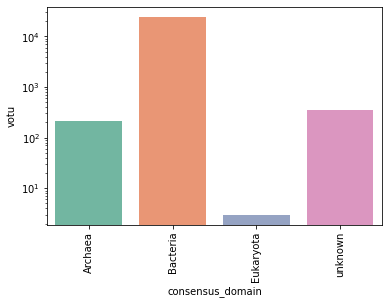

In [913]:
sns.barplot(data = consensus_taxonomy_votus.groupby('consensus_domain',as_index=False).agg({'votu':'count'}),
           x='consensus_domain',
           y='votu',
           palette='Set2')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

# consensus_all_crispr_hits_filter['consensus_domain']

Created curated list of taxonomies to use in analyses: 
1. want sub proteobacteria
2. do not take phylum with "group name" in it  

In [ ]:
array(['Alphaproteobacteria', 'Actinobacteria',
       'delta/epsilon subdivisions', 'Gammaproteobacteria', 'Archaea',
       'cellular organisms', 'Firmicutes', 'Terrabacteria group',
       'Betaproteobacteria', 'Bacteria', 'unknown', 'Proteobacteria',
       'Planctomycetes', 'Verrucomicrobia',
       'Bacteroidetes/Chlorobi group', 'other bacterial phylum',
       'Acidobacteria', 'CPR', 'Chlamydiae', 'Gemmatimonadetes',
       'Eukaryota'], dtype=object)

In [19]:
rachel_colors = {'Acidobacteria':                 '#A54657', #(reddish mauve)
'Actinobacteria':                '#FFCC00', #(warm yellow)
'Bacteroidetes':                 '#F7EE7F', #(cool yellow)
'Archaea':      '#4DAA57', #(green)
'Eukaryota':                   '#F9ECCC', #(cream)
'Firmicutes':                    '#F1A66A', #(peach)
'Gemmatimonadetes':              '#F26157', #(pink coral)
'Planctomycetes':                '#679289', #(dark sea green)
'Proteobacteria':               '#86BBD8', #(light blue)
'Verrucomicrobia':               '#33658A', #(dark blue)
'unknown': 'lightgrey',
'other bacterial phyla': 'dimgrey'}

In [931]:
def get_bacterial_phylum(string):
    '''takes row and provides taxonomies to use in analyses. 
    These are top (most abundant) sub-domain / phyla of bacteria '''
    
    if 'Candidatus Omnitrophica' in string:
        return "other bacterial phyla" 
    
    elif 'Terrabacteria group' in string:
        if len(string.split(",")) < 3:
            return 'Terrabacteria group'
        elif string.split(",")[2] in ['Chloroflexi','Deinococcus-Thermus', 
                                          'Cyanobacteria/Melainabacteria group',
                                          'Tenericutes', 'Armatimonadetes']:
            return 'Terrabacteria group'
        else: return string.split(",")[2]
    
    elif "Eukaryota" in string:
        return "Eukaryota"
    elif "arch" in string.lower():
        return "Archaea" 
    
    
    elif "Proteobacteria" in string:
        if len(string.split(",")) < 3:
            return "Proteobacteria"
        else: 
            # classify oligoflexia and acidithiobacillia as Proteobacteria ... 
            if string.split(',')[2] in ['Acidithiobacillia','Oligoflexia']:
                return "Proteobacteria"
            else: return string.split(',')[2]
    
    elif "Acido" in string:
        return "Acidobacteria"
    
    elif "Bacteria incertae sedis" in string:
        if len(string.split(",")) < 3:
            return 'other bacterial phylum'
        elif "Microgenomates" in string:
            return "CPR"
        elif "Saccharibacteria" in string:
            return "CPR"
        else: return 'other bacterial phyla'
        
    elif len(string.split(",")) < 2:
        return string
    
    elif "group" in string.split(",")[1]:
        if len(string.split(",")) < 2:
            return string
        if len(string.split(",")) < 3:
            return string.split(",")[1]
        else: return string.split(',')[2]
    
    elif string.split(',')[1] in ['Calditrichaeota','Chrysiogenetes','Atribacterota','Dictyoglomi',
                                 'Elusimicrobia','Synergistetes','Deferribacteres',
                                 'Thermodesulfobacteria','Thermotogae','Nitrospirae','Fusobacteria',
                                 'Aquificae','Duplodnaviria','Spirochaetes']:
          return "other bacterial phyla"
    
    
    elif 'cellular organisms' in string:
        return "unknown"
    
    else: return string.split(',')[1]

In [932]:
consensus_taxonomy_votus['sub_domain_consensus'] = consensus_taxonomy_votus["taxa"].apply(
    lambda x: get_bacterial_phylum(x)).str.replace(r'^\s*$','unknown',regex=True).str.replace(
    'cellular organisms',"unknown")
consensus_taxonomy_votus['sub_domain_consensus'].describe()

count              24903
unique                21
top       Actinobacteria
freq                8414
Name: sub_domain_consensus, dtype: object

In [933]:
consensus_taxonomy_votus['sub_domain_consensus'].unique()

array(['Alphaproteobacteria', 'Actinobacteria',
       'delta/epsilon subdivisions', 'Gammaproteobacteria', 'Archaea',
       'unknown', 'Firmicutes', 'Terrabacteria group',
       'Betaproteobacteria', 'Bacteria', 'unclassified bacterial viruses',
       'Proteobacteria', 'Planctomycetes', 'Verrucomicrobia',
       'Bacteroidetes/Chlorobi group', 'other bacterial phyla',
       'Acidobacteria', 'CPR', 'Chlamydiae', 'Gemmatimonadetes',
       'Eukaryota'], dtype=object)

In [936]:
consensus_taxonomy_votus = consensus_taxonomy_votus.replace(
    {'sub_domain_consensus':{'unclassified bacterial viruses':'Bacteria'}})

In [944]:
consensus_taxonomy_votus.to_csv(
'/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/host_info/consensus_host_taxa_3.csv',
                                       index=False)

In [17]:
consensus_taxonomy_votus = pd.read_csv(
'/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/CRISPRs/host_info/consensus_host_taxa_3.csv' 
)

In [20]:
lazy_coloring = {}
for taxa in consensus_taxonomy_votus['sub_domain_consensus'].unique():
        if "arch" in taxa.lower():
             lazy_coloring[taxa] = rachel_colors[taxa]
        elif "Eukaryota" in taxa:
            lazy_coloring[taxa] =  rachel_colors[taxa]
        elif "proteobacteria" in taxa.lower():
            lazy_coloring[taxa] = rachel_colors['Proteobacteria']
        elif "delta" in taxa.lower():
            lazy_coloring[taxa] = rachel_colors['Proteobacteria']
            
        elif "Bacteroidetes" in taxa:
            lazy_coloring[taxa] = rachel_colors['Bacteroidetes']
            
        elif "Bacteria" in taxa:
            lazy_coloring[taxa]='dimgrey'
        elif "CPR" in taxa:
            lazy_coloring[taxa]='#9ebd8f'
        elif "Terrabacteria group" in taxa:
            lazy_coloring[taxa] ='#f17e6a'
        elif "Chlamydiae" in taxa:
            lazy_coloring[taxa] = '#7494ab'
        
        else: lazy_coloring[taxa] = rachel_colors[taxa]

In [22]:
sub_domain_order = ['Actinobacteria',
    'Alphaproteobacteria',  'Betaproteobacteria', 'Gammaproteobacteria', 'delta/epsilon subdivisions', 'Proteobacteria',
    'Firmicutes', 'Bacteroidetes/Chlorobi group','Terrabacteria group', 'Planctomycetes', 'Verrucomicrobia', 
    'Gemmatimonadetes','CPR', "Chlamydiae",
    'Archaea',  'Eukaryota', 'Bacteria','other bacterial phyla','unknown',  
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


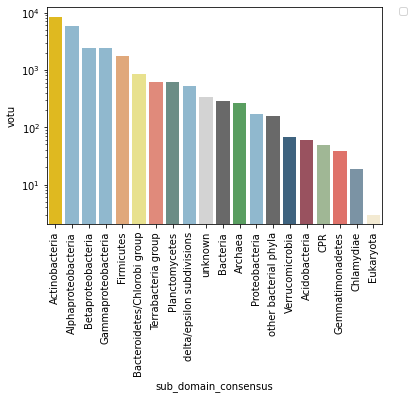

In [26]:
data = consensus_taxonomy_votus\
    .groupby('sub_domain_consensus',as_index=False)\
    .agg({'votu':'count'})\
    .sort_values('votu',ascending=False)
data['cat']=data['sub_domain_consensus'].map(lazy_coloring)
sns.barplot(x='sub_domain_consensus',
           y='votu',
            # hue = 'sub_domain_consensus', 
            data = data,
            # order = sub_domain_order,
            dodge=False,
           palette=lazy_coloring)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yscale('log')
plt.savefig(
'/groups/banfield/projects/environmental/4thwedge/2021/4Wh2oV/figures_out/pHost/barplot_votuhost_phylum_update.pdf',
    format='pdf'
)
plt.show()